[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lisuex/Machine-Learning2025/blob/main/Lab08.ipynb)

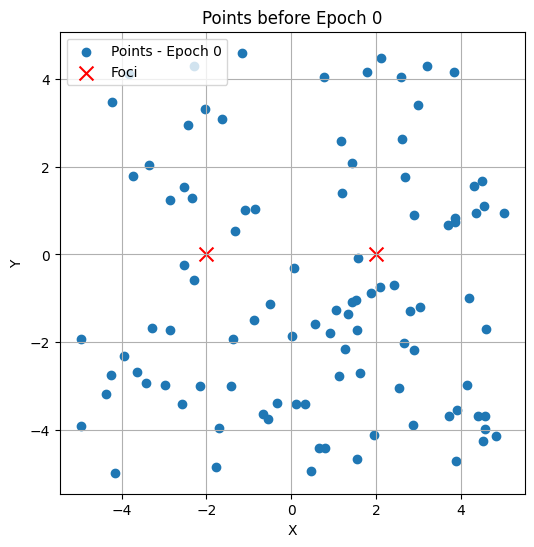

In [36]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Fix the random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define ellipse parameters
focus1 = torch.tensor([-2.0, 0.0])  # First focus
focus2 = torch.tensor([2.0, 0.0])   # Second focus
constant_sum = 6.0  # The sum of distances to the two foci

# Initialize random 2D points from uniform distribution
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True


def plot_results(epoch, trajectories, loss_history=None):
    if loss_history is not None:
      fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    else:
      fig, axes = plt.subplots(1, 1, figsize=(6, 6))
      axes = [axes]
    points = np.array([trajectories[i][-1] for i in range(num_points)])
    # Left plot: Scatter of points with trajectories
    axes[0].scatter(points[:, 0], points[:, 1], label=f'Points - Epoch {epoch}')
    f1 = focus1.detach().cpu().numpy()
    f2 = focus2.detach().cpu().numpy()
    axes[0].scatter([f1[0], f2[0]], [f1[1], f2[1]], color='red', marker='x', s=100, label='Foci')

    # Draw movement traces
    for i in range(num_points):
        trajectory = np.array(trajectories[i])
        axes[0].plot(trajectory[:, 0], trajectory[:, 1], color='gray', linestyle='-', linewidth=0.5)

    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    axes[0].legend()


    axes[0].grid()

    if loss_history is not None:
      axes[0].set_title(f'Points after Epoch {epoch}')
      # Right plot: Loss history
      axes[1].plot(loss_history, color='blue')
      axes[1].set_xlabel("Epoch")
      axes[1].set_ylabel("Loss")
      axes[1].set_title("Loss Convergence")
      axes[1].grid()
    else:
      axes[0].set_title(f'Points before Epoch {epoch}')

    plt.show()

# Reset trajectories
trajectories = [[] for _ in range(num_points)]
loss_history = []

for i in range(num_points):
    trajectories[i].append(points[i].detach().cpu().clone().numpy())

plot_results(0, trajectories, None)


In [37]:
import torch
import matplotlib.pyplot as plt
import numpy as np


def train(loss_type):
    # Fix the random seed for reproducibility
    torch.manual_seed(42)
    np.random.seed(42)

    # Define ellipse parameters
    focus1 = torch.tensor([-2.0, 0.0])  # First focus
    focus2 = torch.tensor([2.0, 0.0])   # Second focus
    constant_sum = 6.0  # The sum of distances to the two foci

    # Initialize random 2D points from uniform distribution
    num_points = 100
    points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
    points.requires_grad = True

    # Reset trajectories
    trajectories = [[] for _ in range(num_points)]
    loss_history = []


    import time
    # Start timing
    start_time = time.time()


    # Define optimizer
    optimizer = torch.optim.Adam([points], lr=0.1)

    # Training loop
    num_epochs = 1000
    for epoch in range(num_epochs):
        optimizer.zero_grad()

        # Compute distances to both foci
        dist1 = torch.norm(points - focus1, dim=1)
        dist2 = torch.norm(points - focus2, dim=1)

        epsilons = dist1 + dist2 - constant_sum

        if loss_type == "l2":
            # Original MSE loss (what you had in class)
            loss = torch.mean(epsilons ** 2)
        elif loss_type == "l1":
            # L1 loss
            loss = torch.mean(torch.abs(epsilons))
        elif loss_type == "l0":
            # L0 "loss" (non-differentiable!)
            loss = torch.mean((epsilons != 0).float())
        elif loss_type == "linf":
            # Linf loss (maximum error)
            loss = torch.max(torch.abs(epsilons))
        else:
            raise ValueError(f"Unknown loss type: {loss_type}")

        # loss backward does not work for L0
        if loss.requires_grad:
            loss.backward()
            optimizer.step()

        loss_history.append(loss.item())

        # Store current positions for tracking movement
        for i in range(num_points):
            trajectories[i].append(points[i].detach().cpu().clone().numpy())

        # Plot results every 10th epoch
        if epoch % 50 == 0:
            plot_results(epoch, trajectories, loss_history)

        if epoch % 50 == 0:
            print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

    #Final plot
    plot_results(epoch, trajectories, loss_history)


    # End timing
    end_time = time.time()

    # Calculate the elapsed time
    elapsed_time = end_time - start_time
    print(f"Elapsed time: {elapsed_time} seconds")

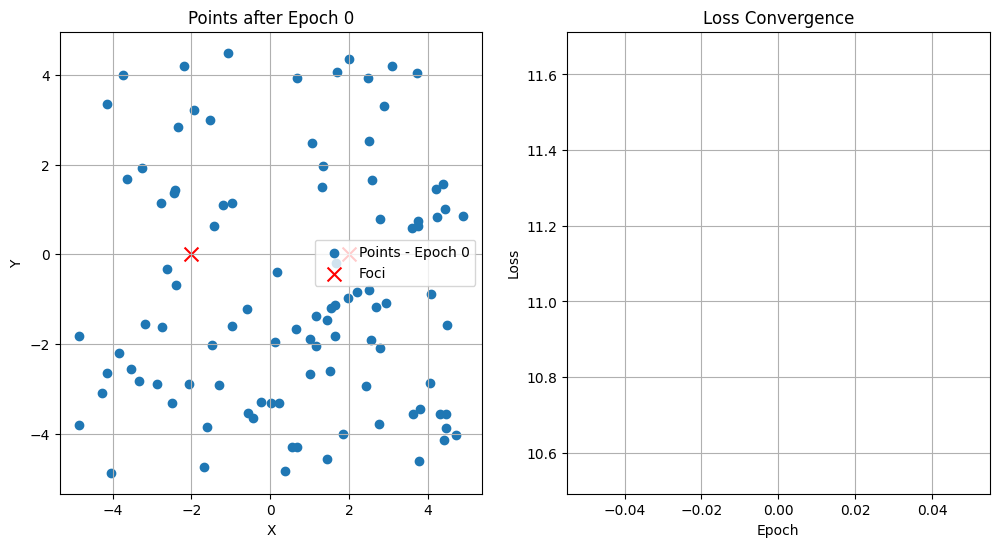

Epoch 0: Loss = 11.102331


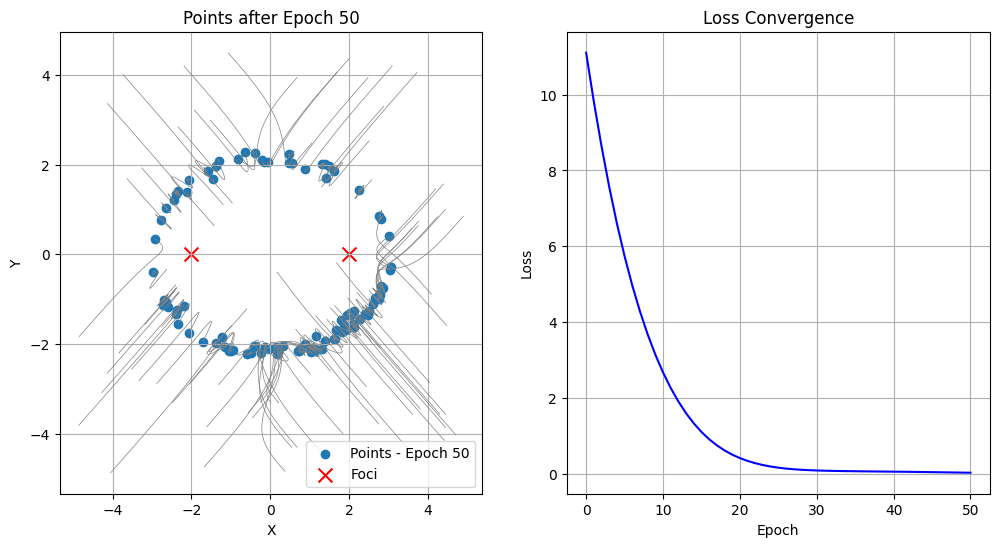

Epoch 50: Loss = 0.034578


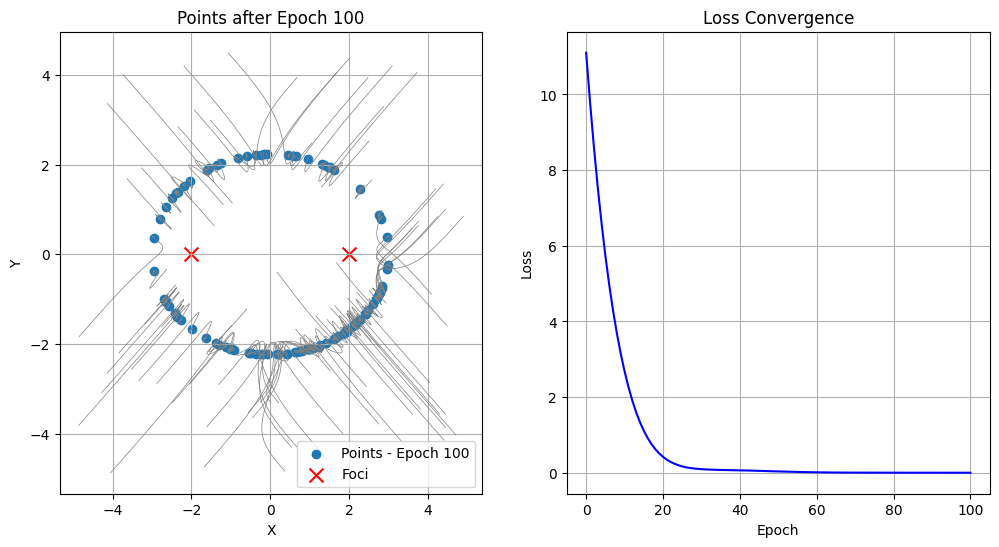

Epoch 100: Loss = 0.000153


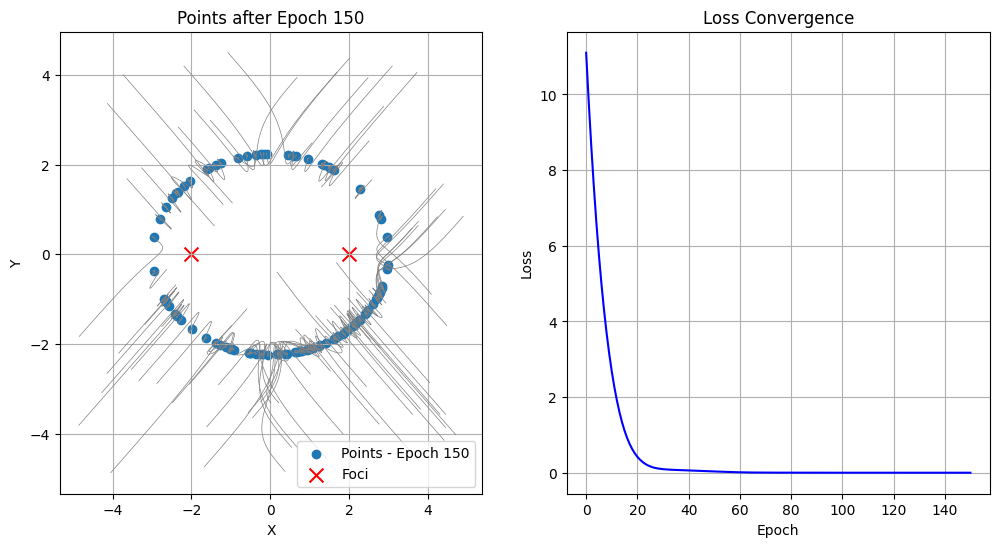

Epoch 150: Loss = 0.000001


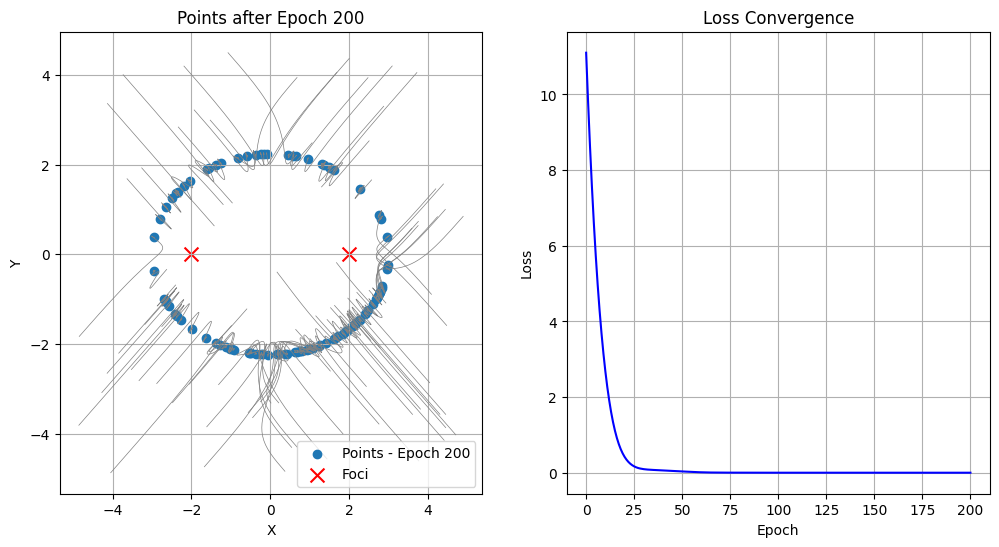

Epoch 200: Loss = 0.000000


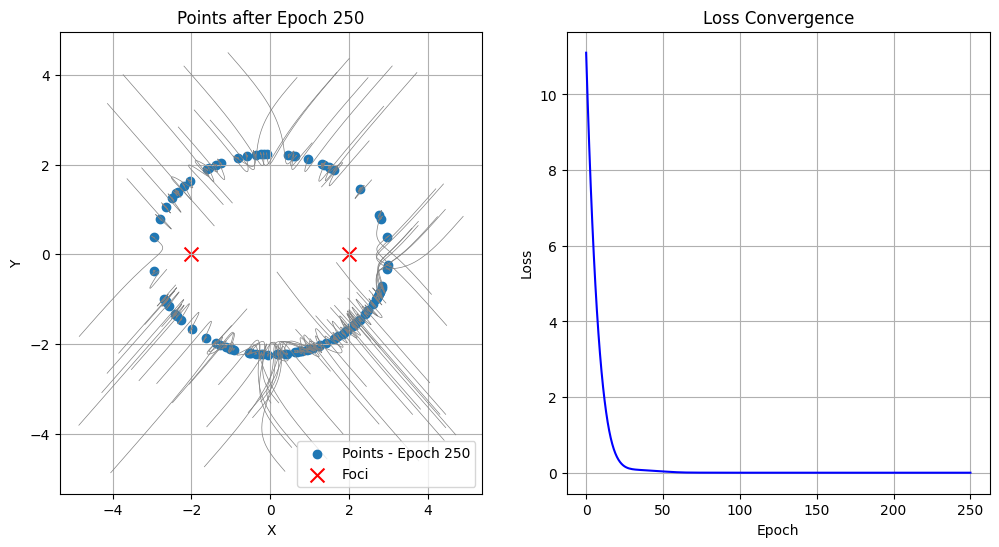

Epoch 250: Loss = 0.000000


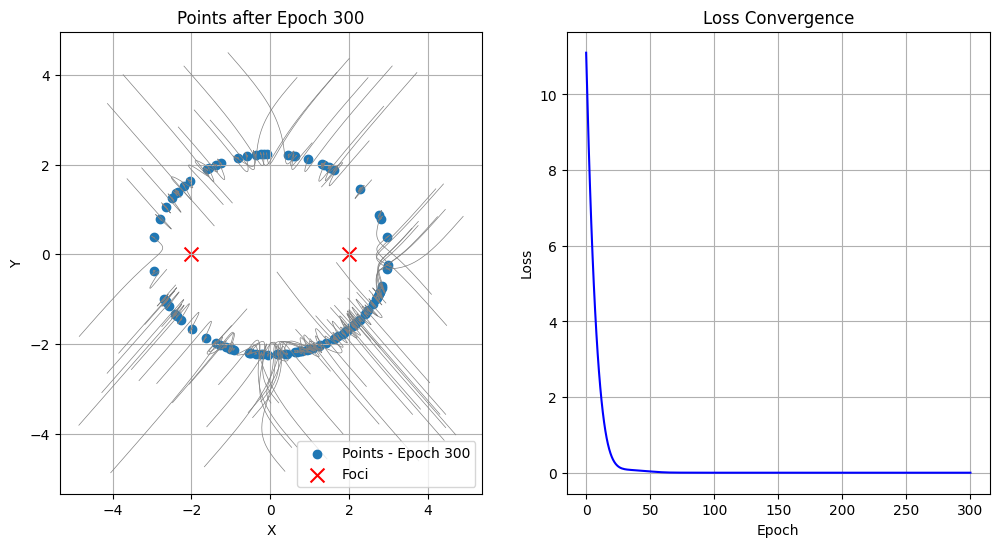

Epoch 300: Loss = 0.000000


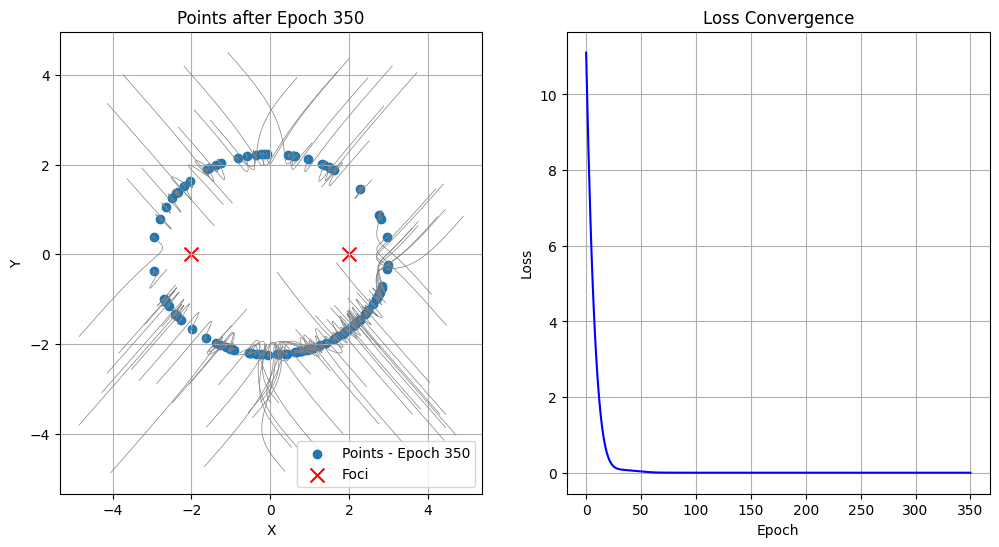

Epoch 350: Loss = 0.000000


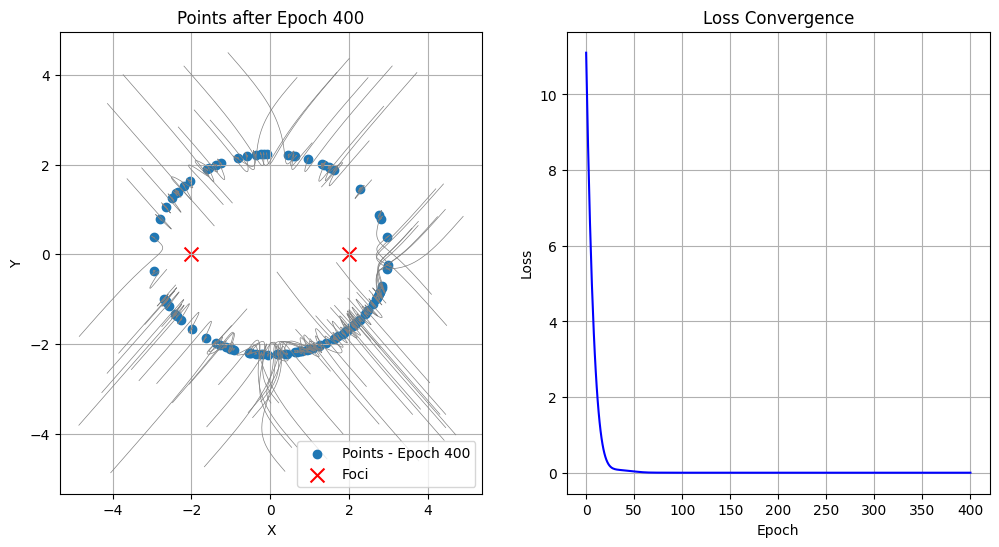

Epoch 400: Loss = 0.000000


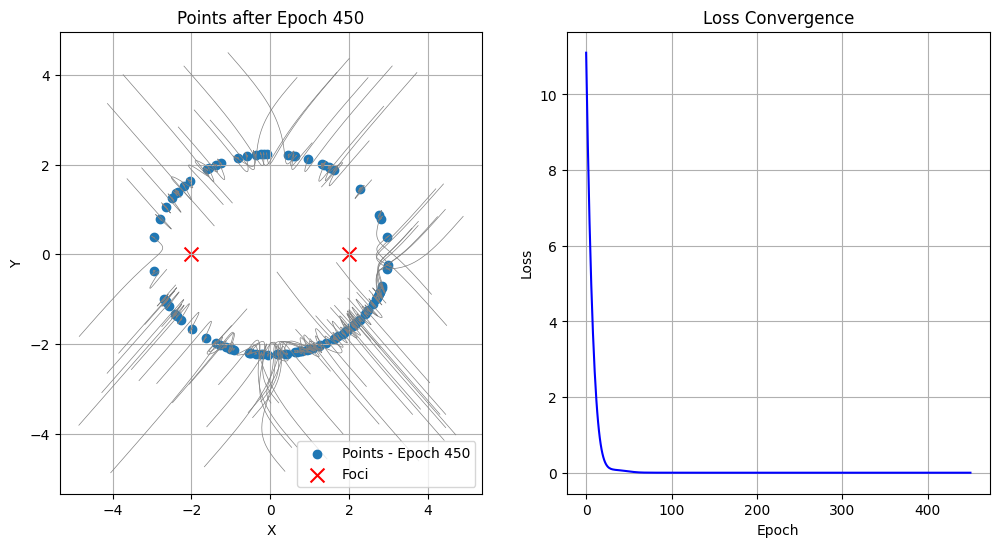

Epoch 450: Loss = 0.000000


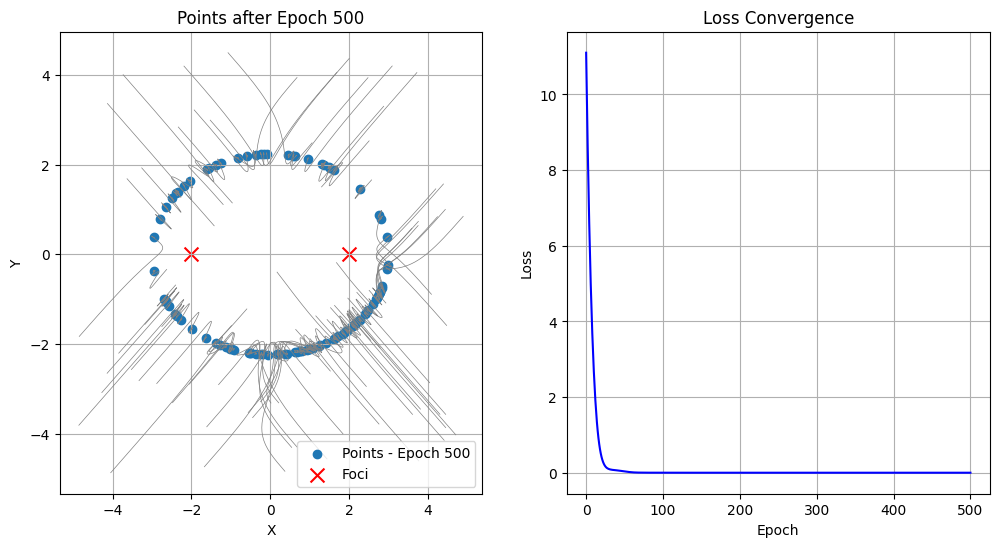

Epoch 500: Loss = 0.000000


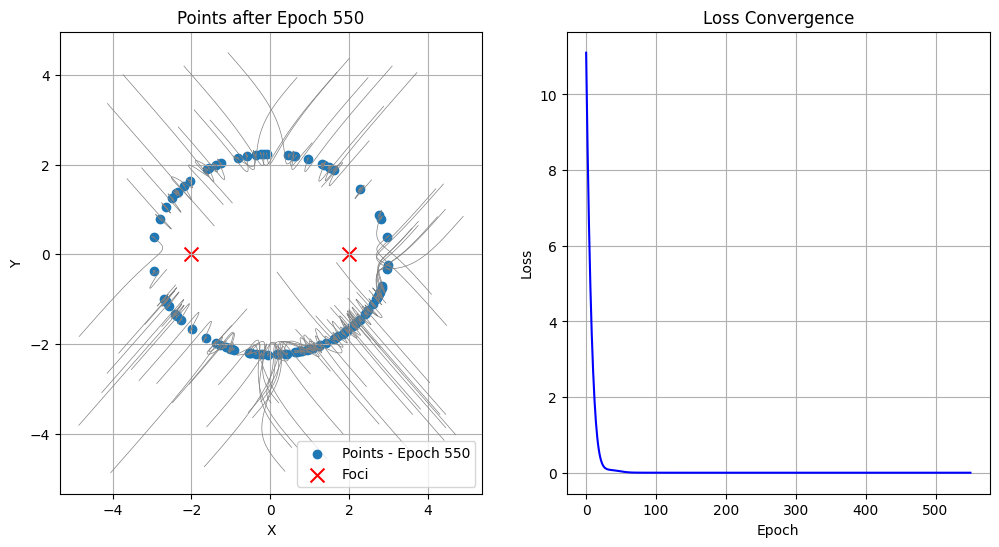

Epoch 550: Loss = 0.000000


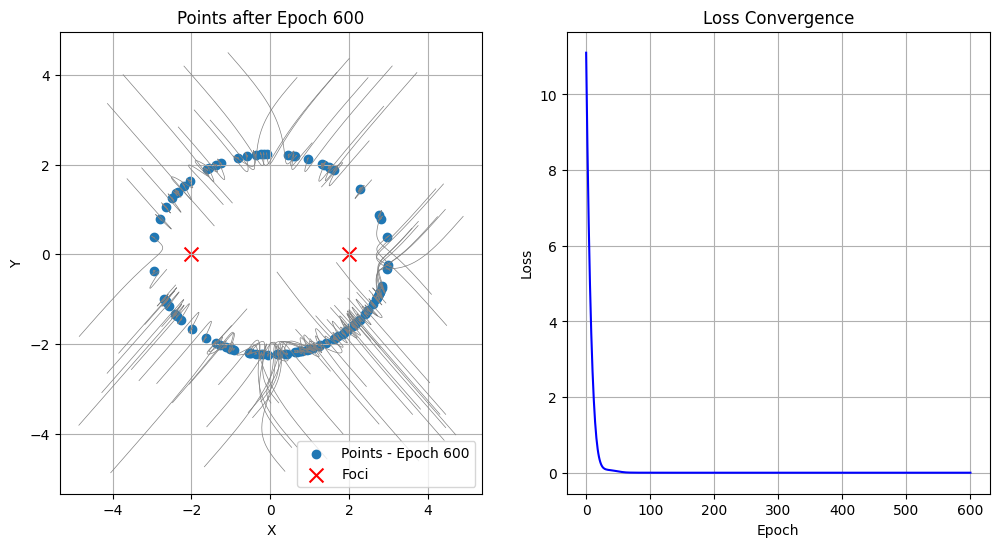

Epoch 600: Loss = 0.000000


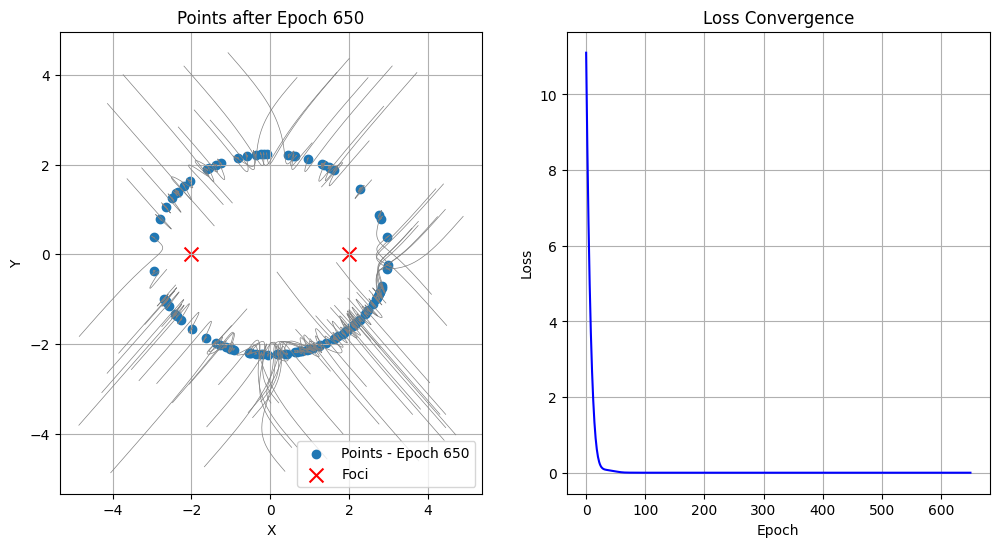

Epoch 650: Loss = 0.000000


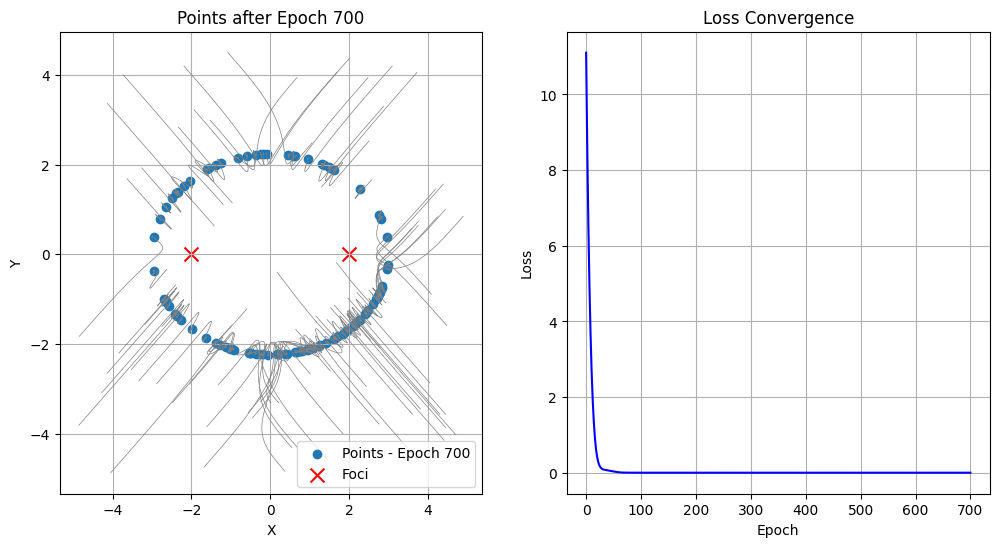

Epoch 700: Loss = 0.000000


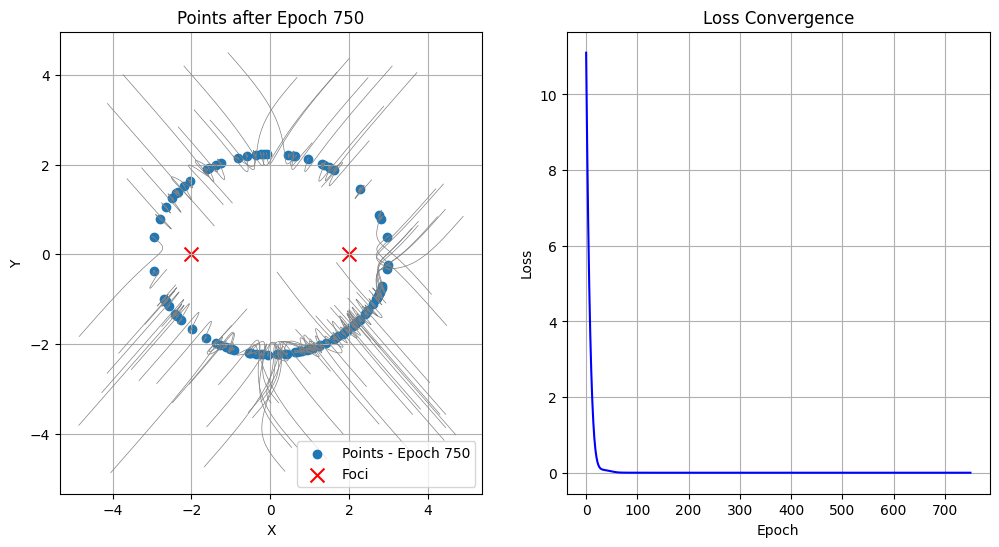

Epoch 750: Loss = 0.000000


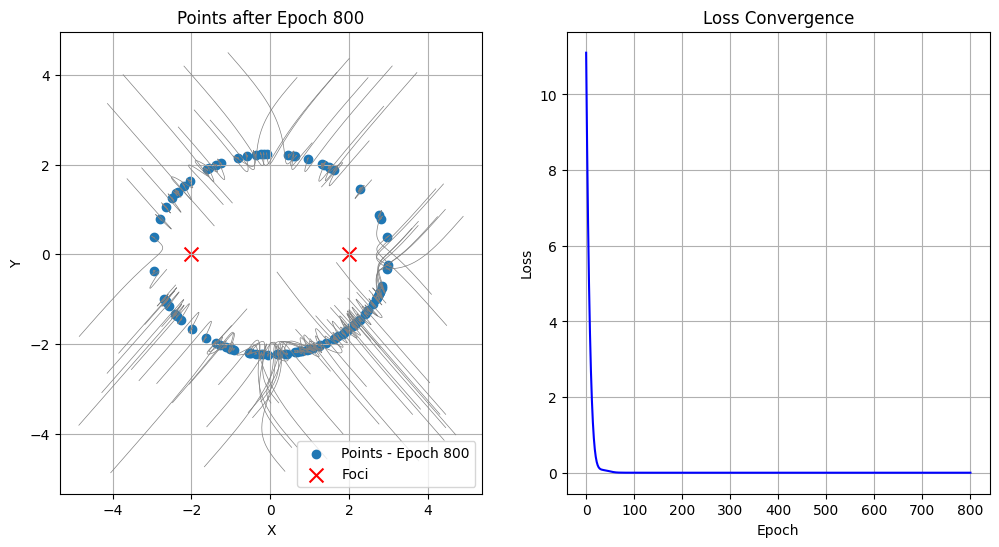

Epoch 800: Loss = 0.000000


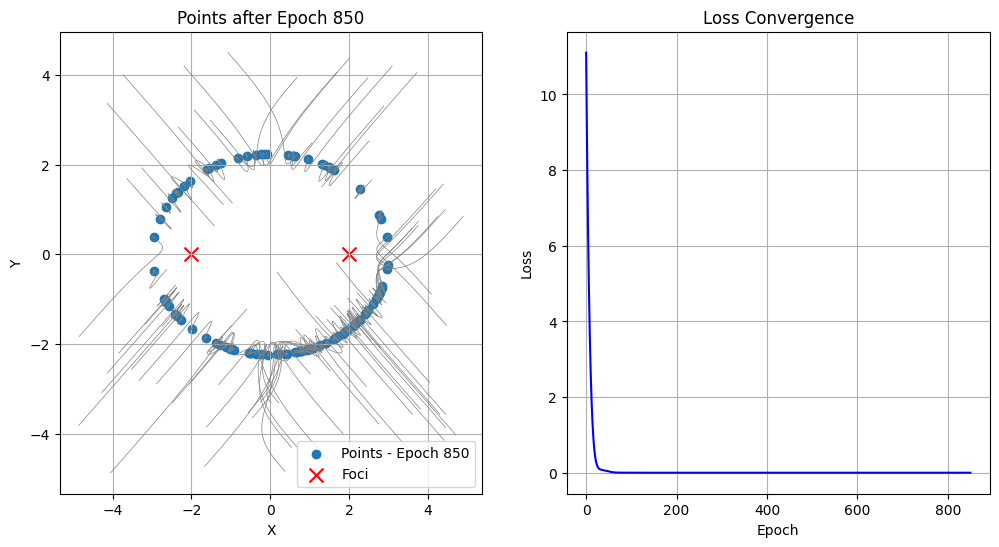

Epoch 850: Loss = 0.000000


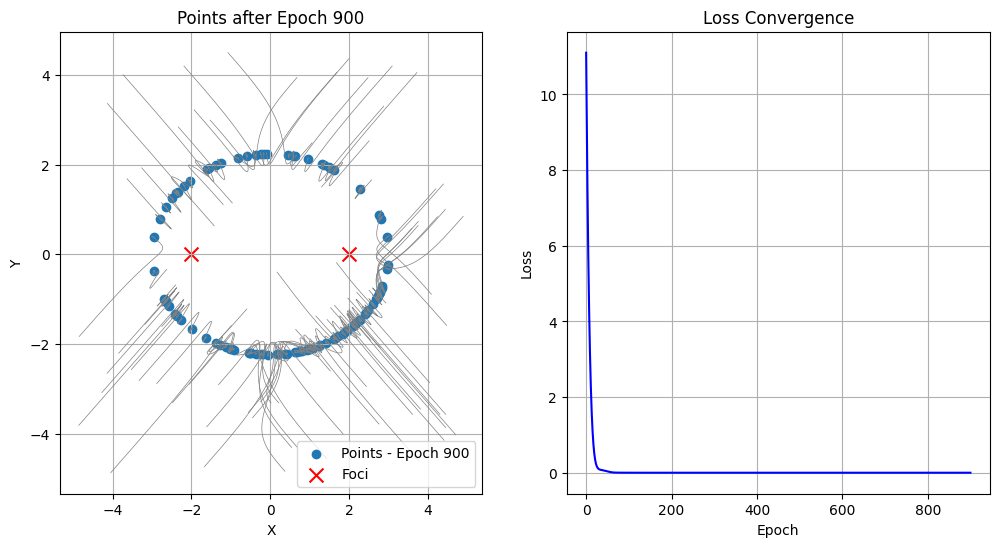

Epoch 900: Loss = 0.000000


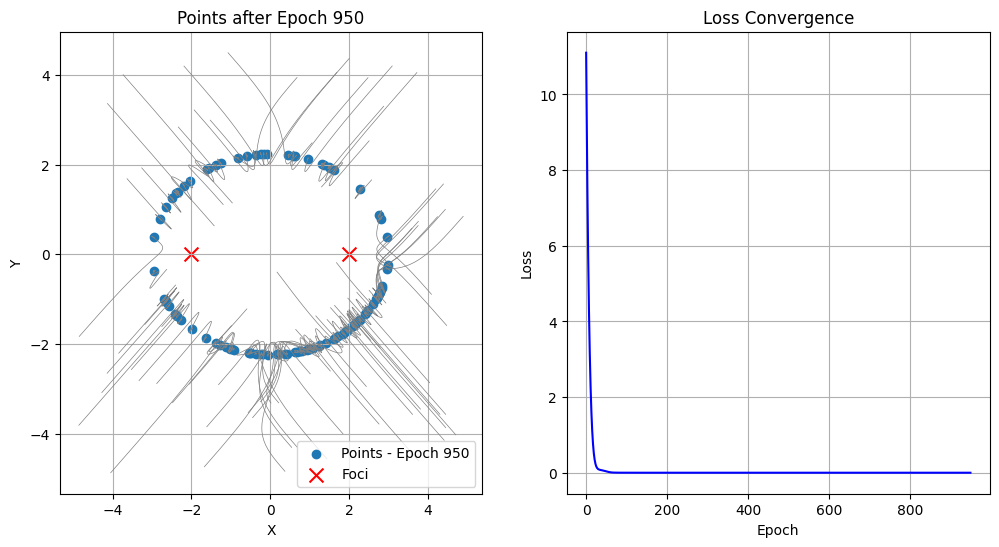

Epoch 950: Loss = 0.000000


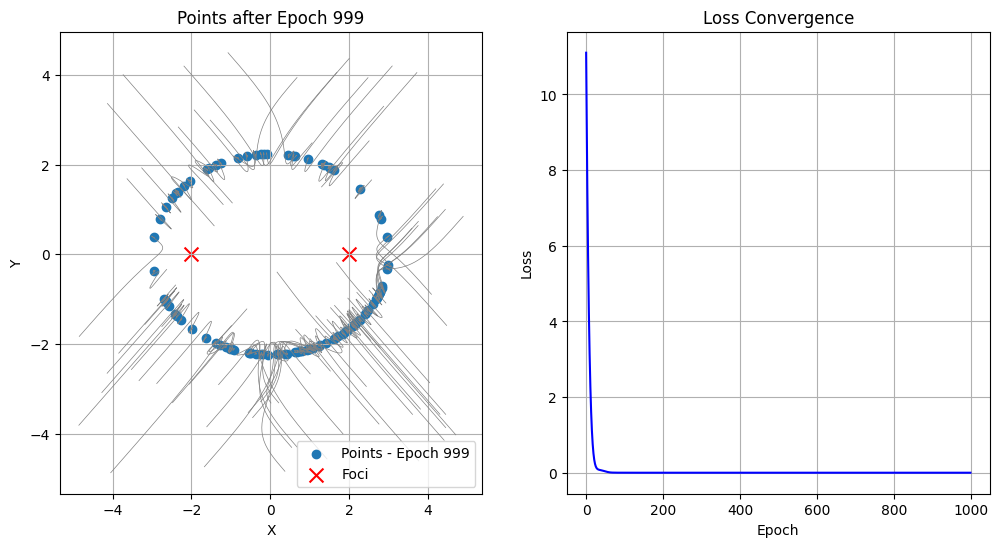

Elapsed time: 14.617177963256836 seconds


In [38]:
# L2 Norm
train(loss_type="l2")

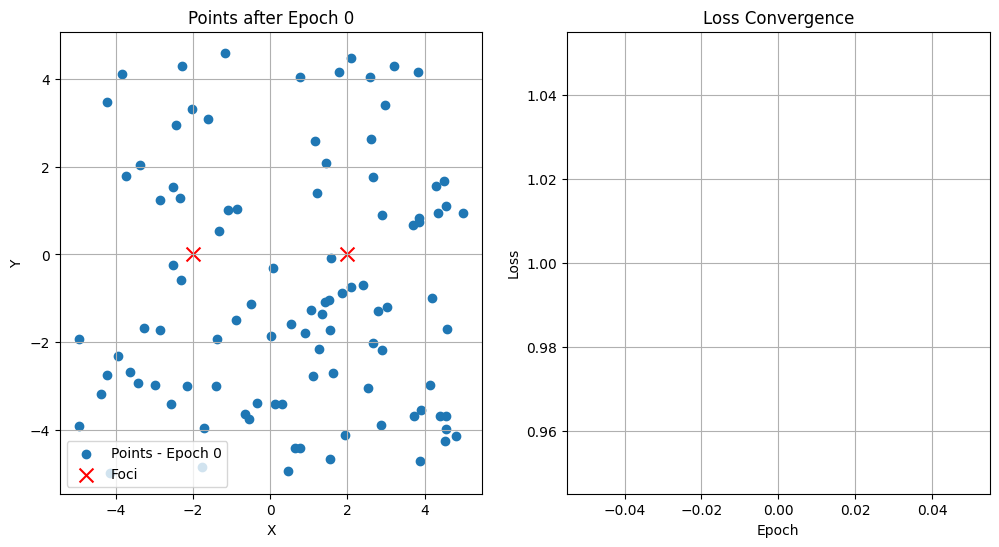

Epoch 0: Loss = 1.000000


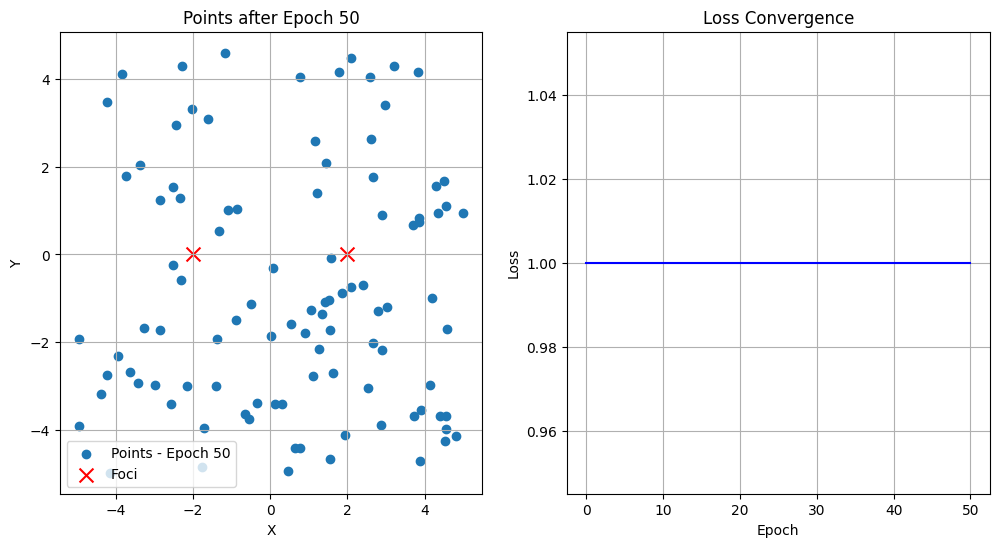

Epoch 50: Loss = 1.000000


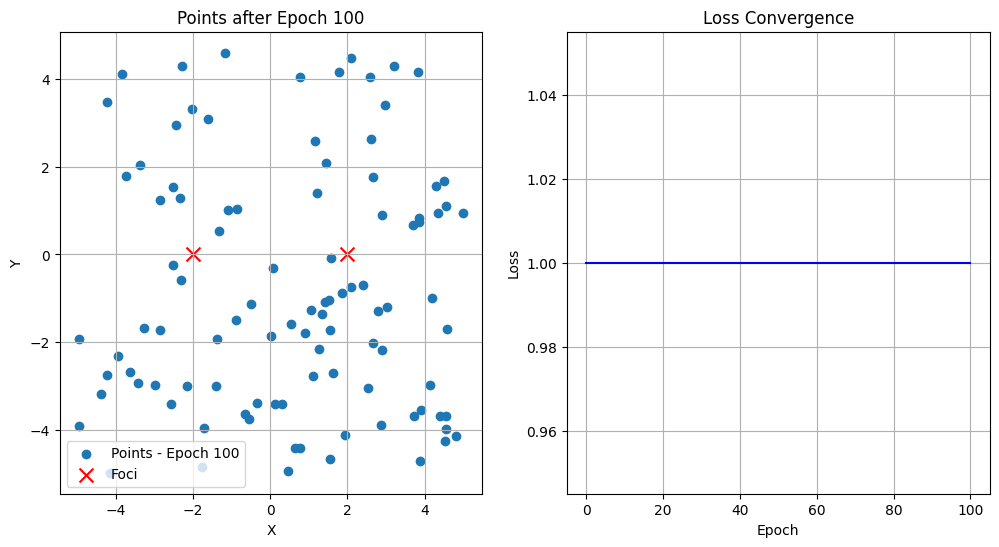

Epoch 100: Loss = 1.000000


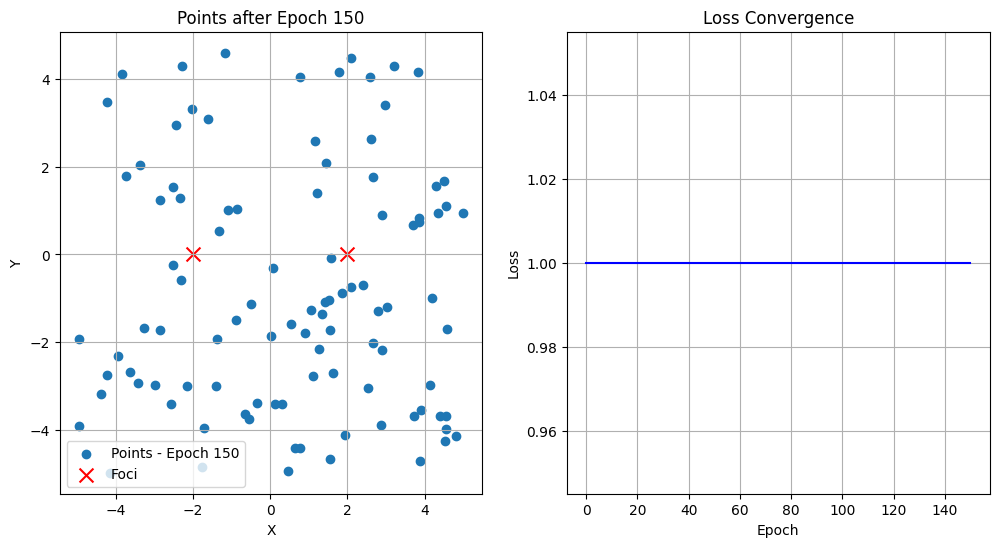

Epoch 150: Loss = 1.000000


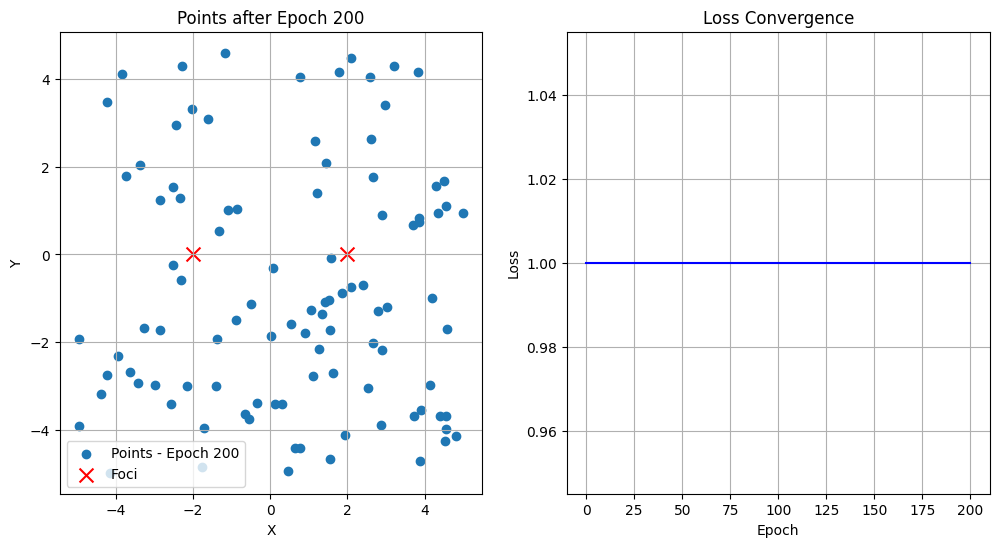

Epoch 200: Loss = 1.000000


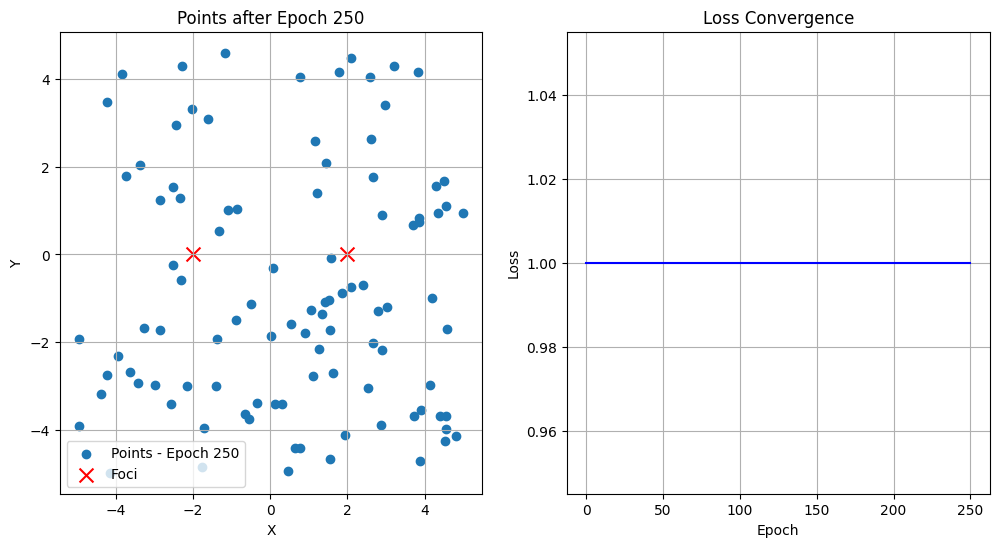

Epoch 250: Loss = 1.000000


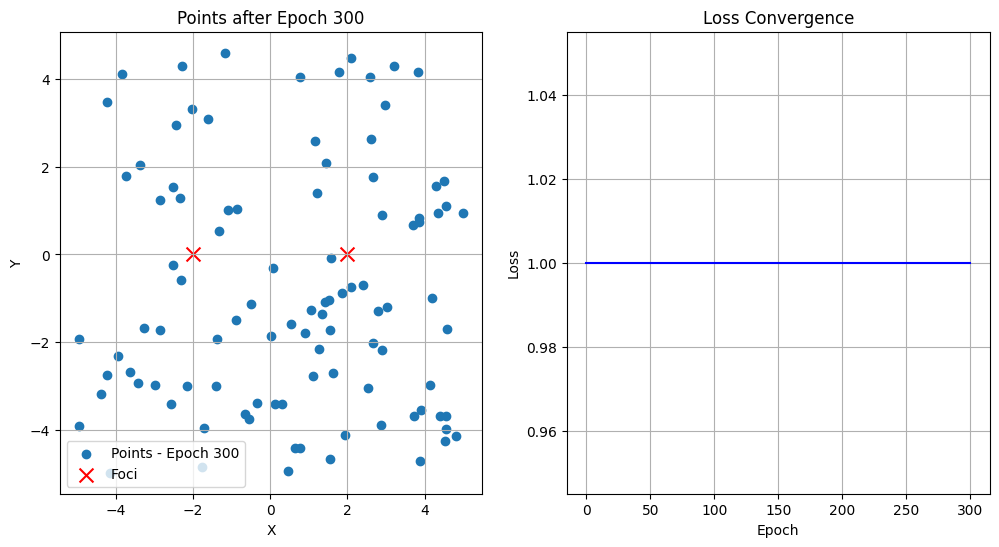

Epoch 300: Loss = 1.000000


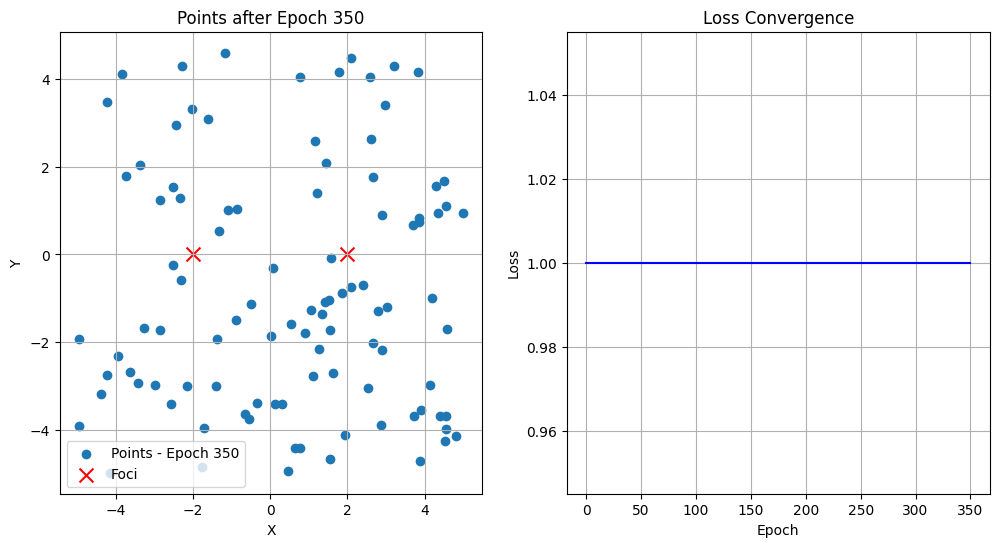

Epoch 350: Loss = 1.000000


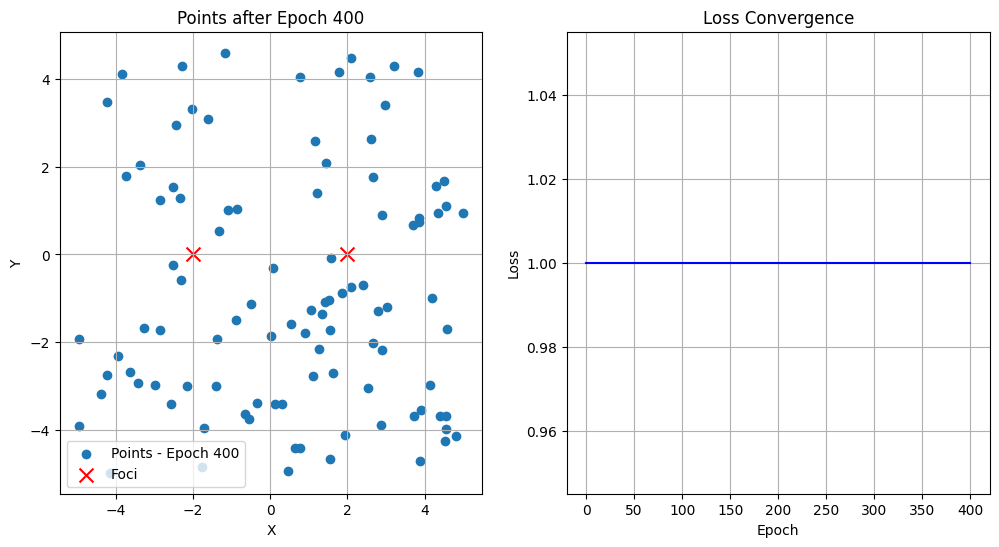

Epoch 400: Loss = 1.000000


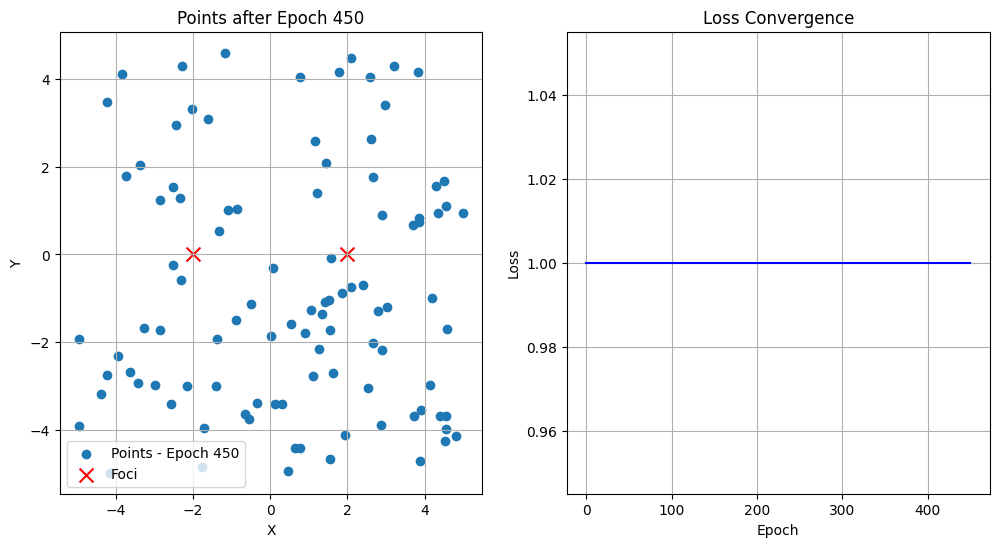

Epoch 450: Loss = 1.000000


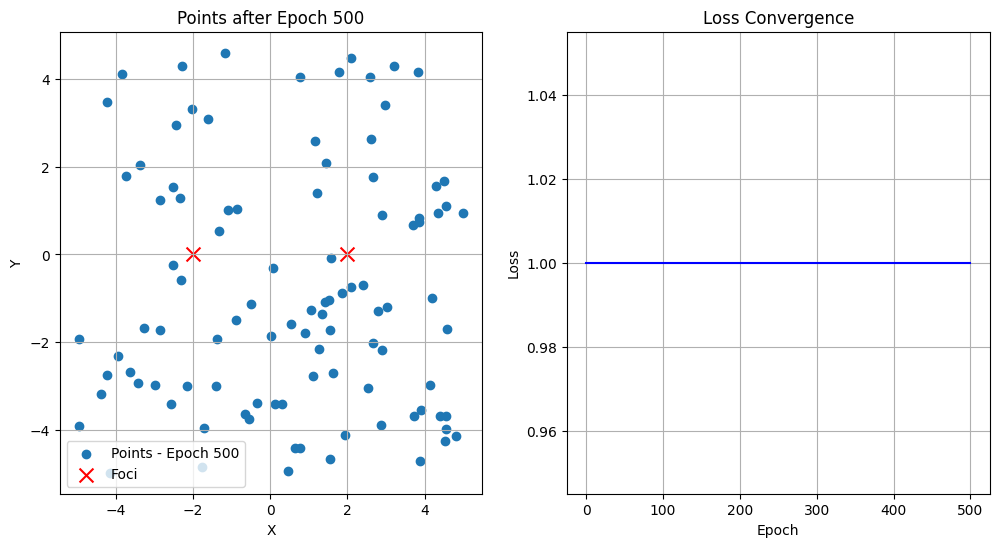

Epoch 500: Loss = 1.000000


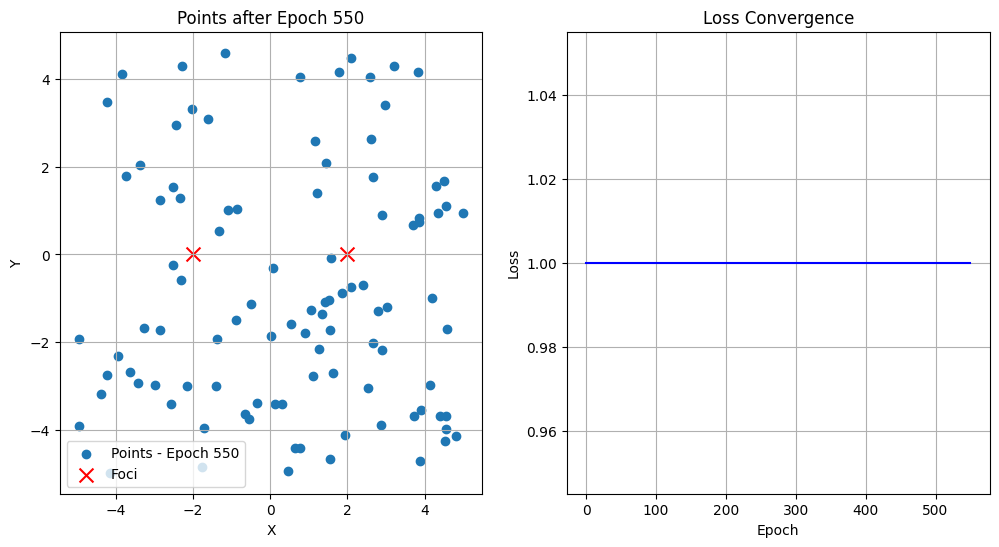

Epoch 550: Loss = 1.000000


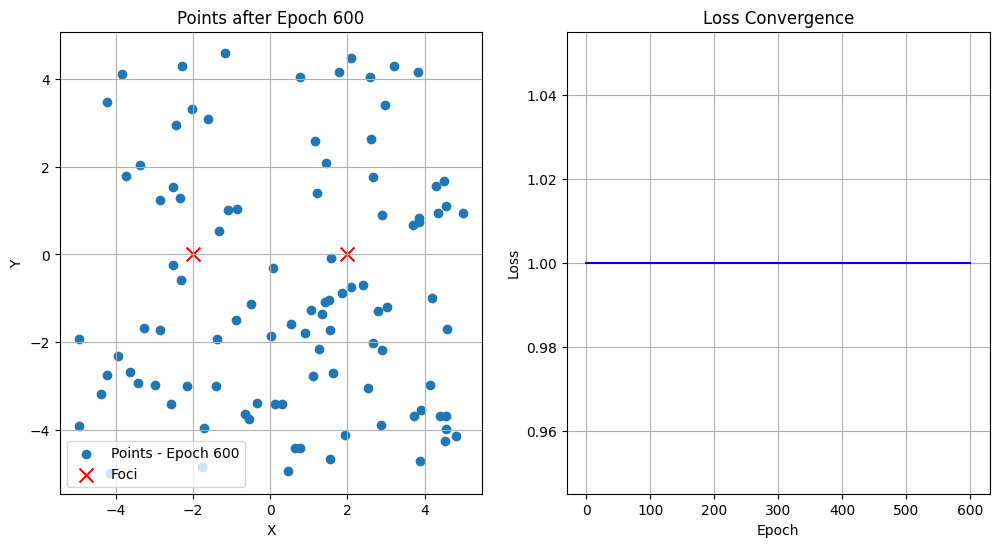

Epoch 600: Loss = 1.000000


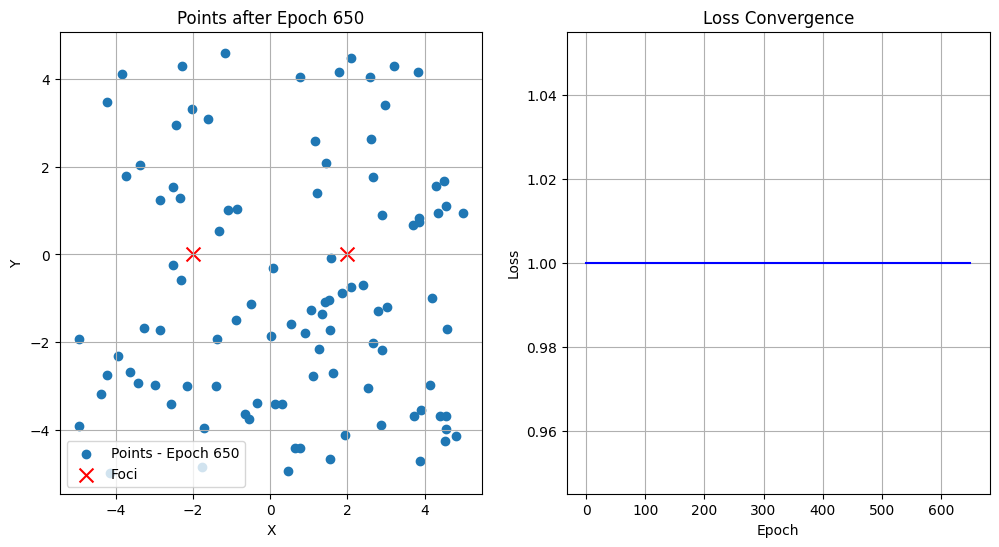

Epoch 650: Loss = 1.000000


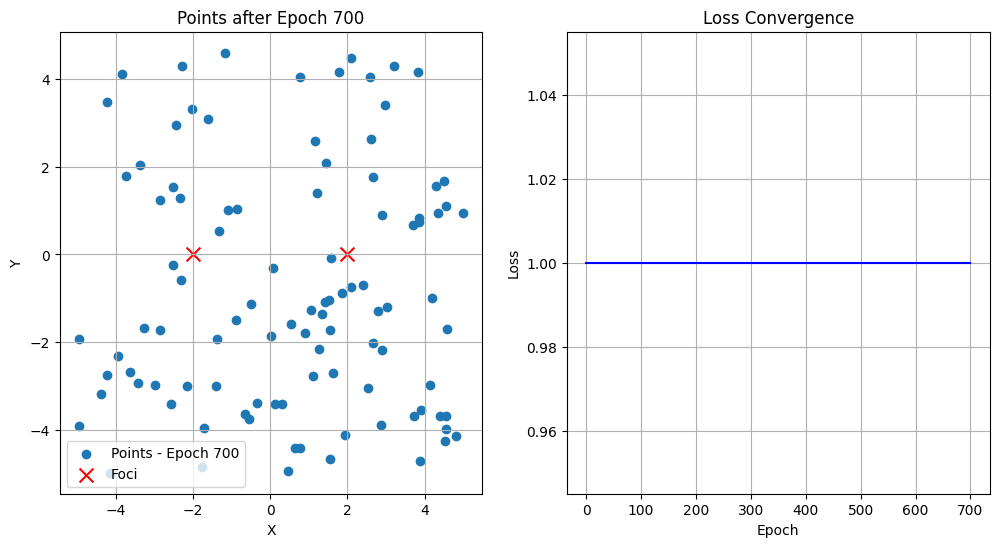

Epoch 700: Loss = 1.000000


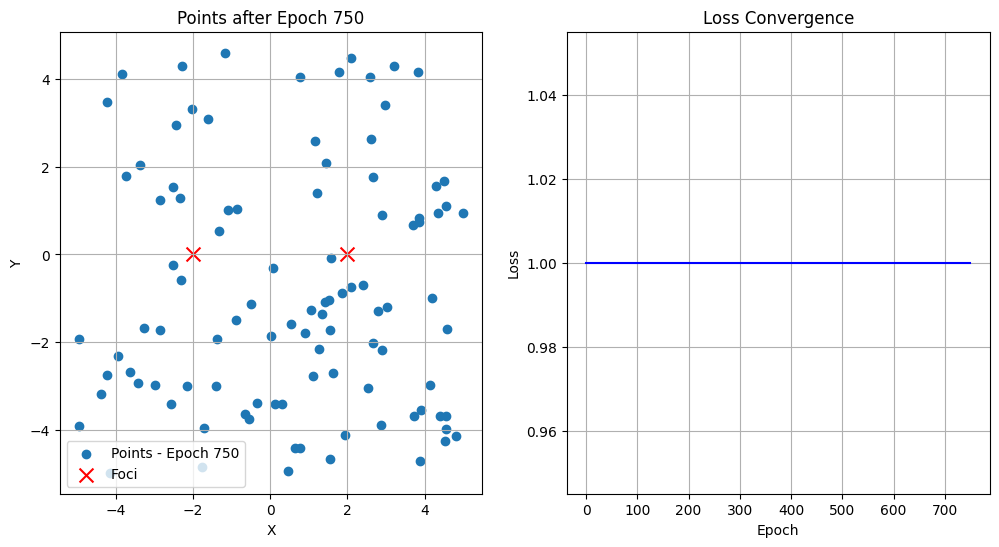

Epoch 750: Loss = 1.000000


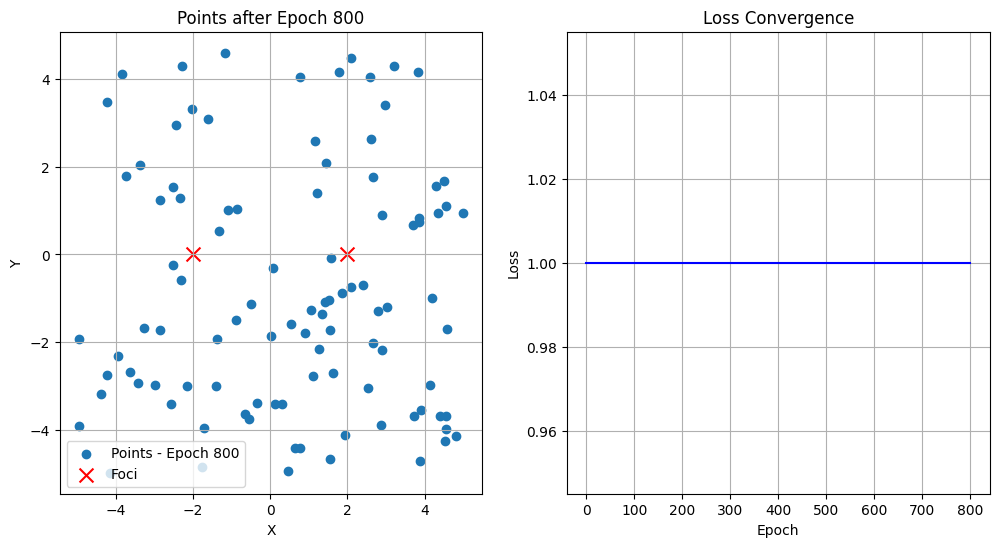

Epoch 800: Loss = 1.000000


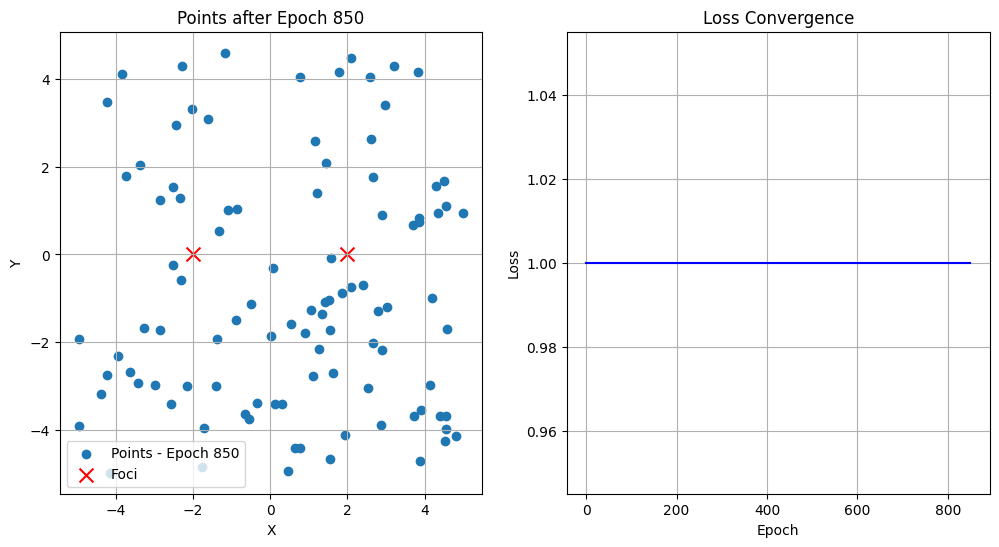

Epoch 850: Loss = 1.000000


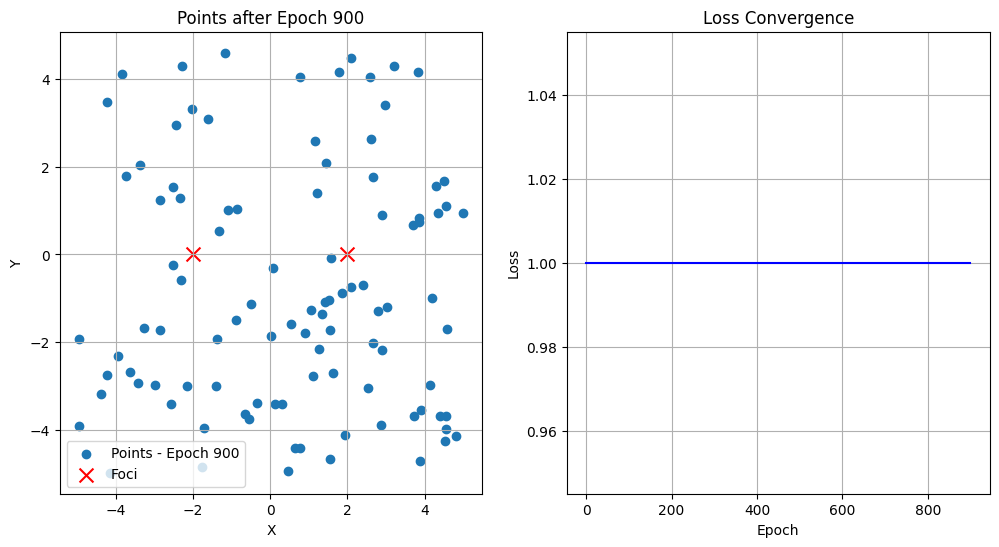

Epoch 900: Loss = 1.000000


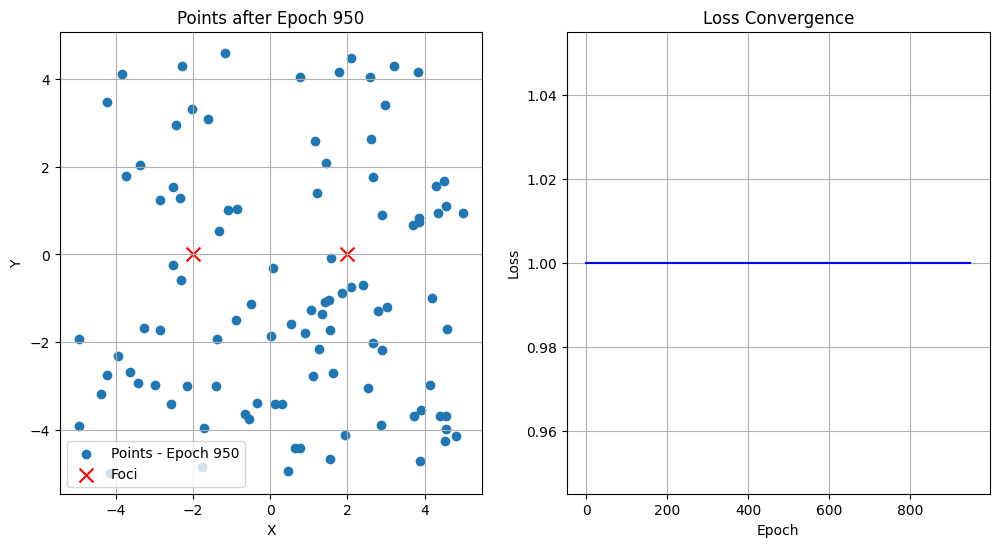

Epoch 950: Loss = 1.000000


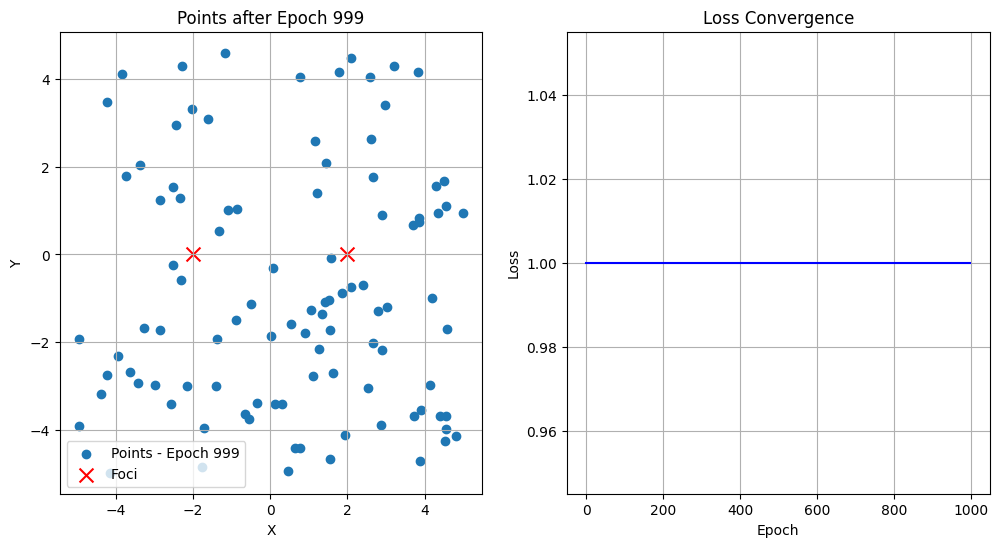

Elapsed time: 13.987994194030762 seconds


In [39]:
# L0 norm
train(loss_type="l0")

**Why does the training not progress over epochs?**


*   The $\ell_0$ loss is not differentiable because operation epsilon_i != 0 is discrete step
*   Gradients are zero almost everywhere,  meaning that gradient descent cannot know which direction to move.

As the result the optimizer cannot find gradients to update points.


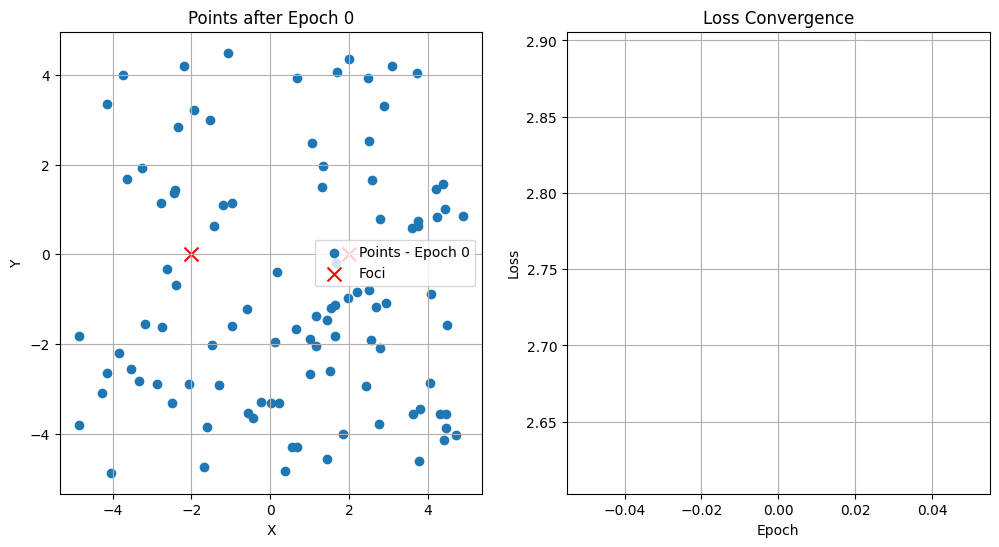

Epoch 0: Loss = 2.754212


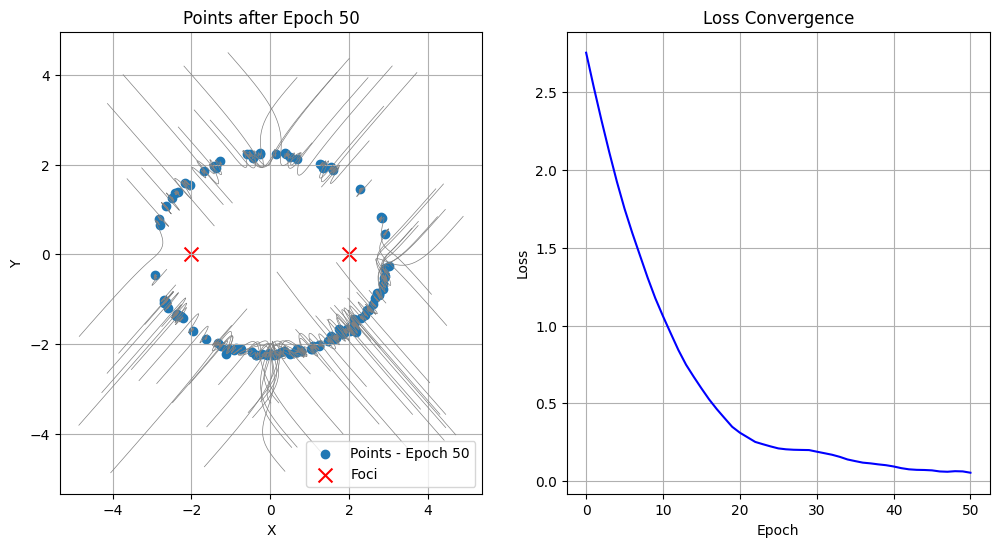

Epoch 50: Loss = 0.053497


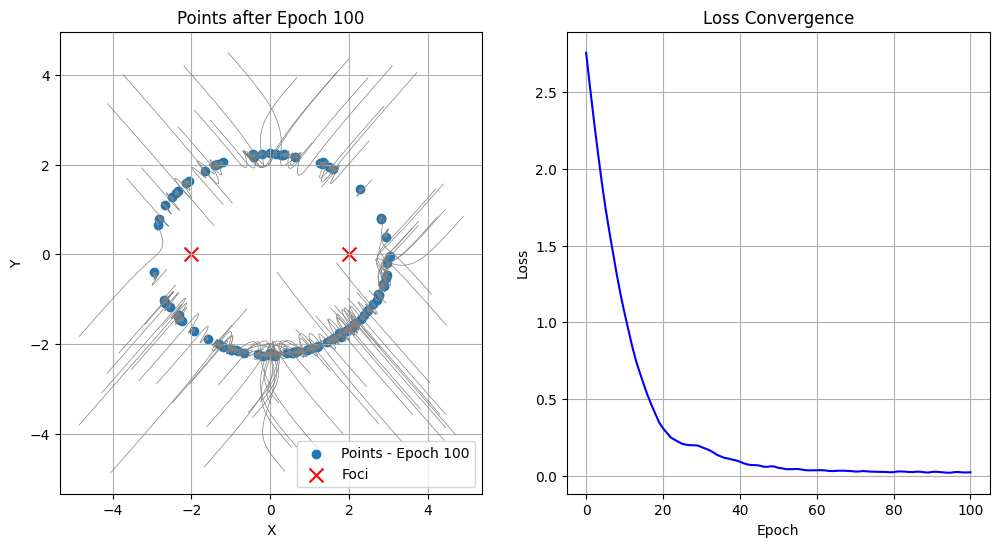

Epoch 100: Loss = 0.024422


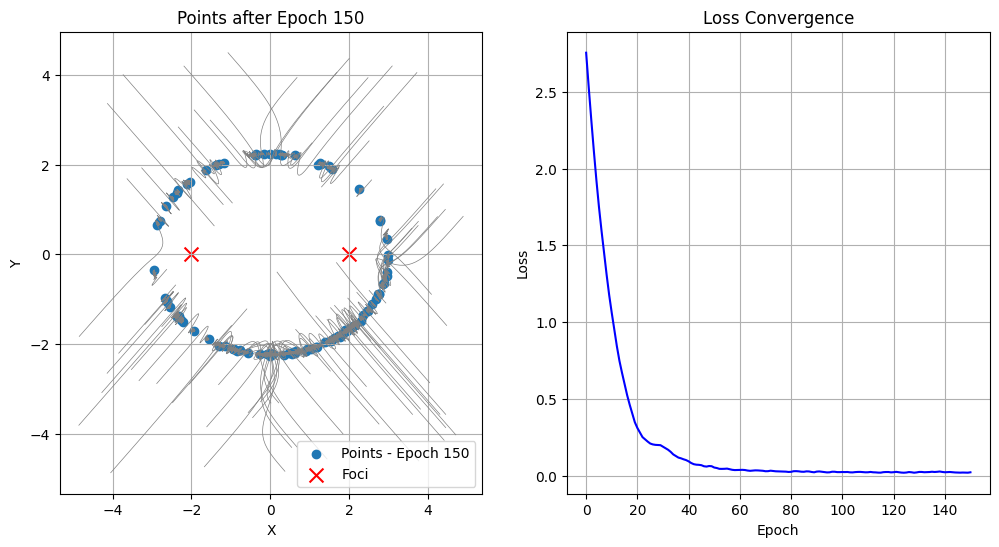

Epoch 150: Loss = 0.022459


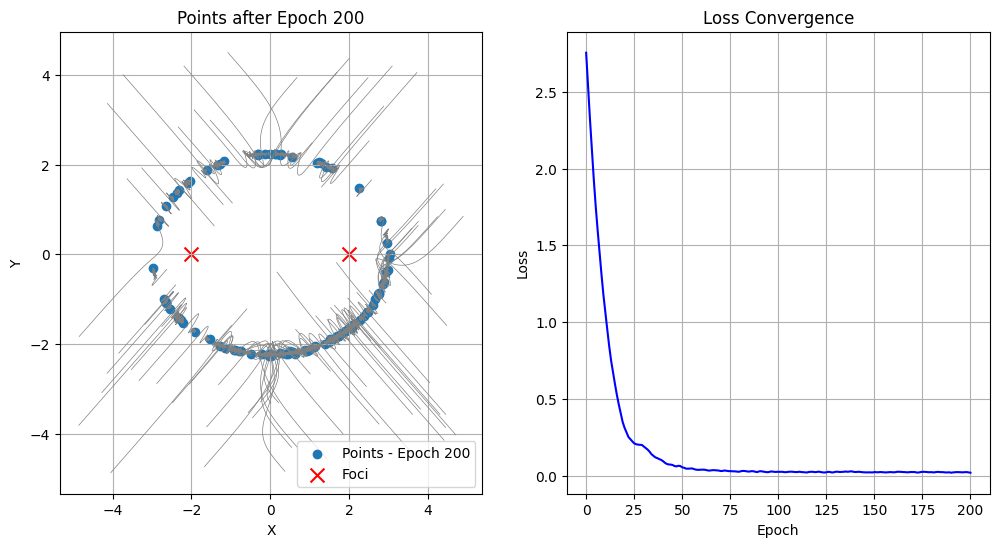

Epoch 200: Loss = 0.018269


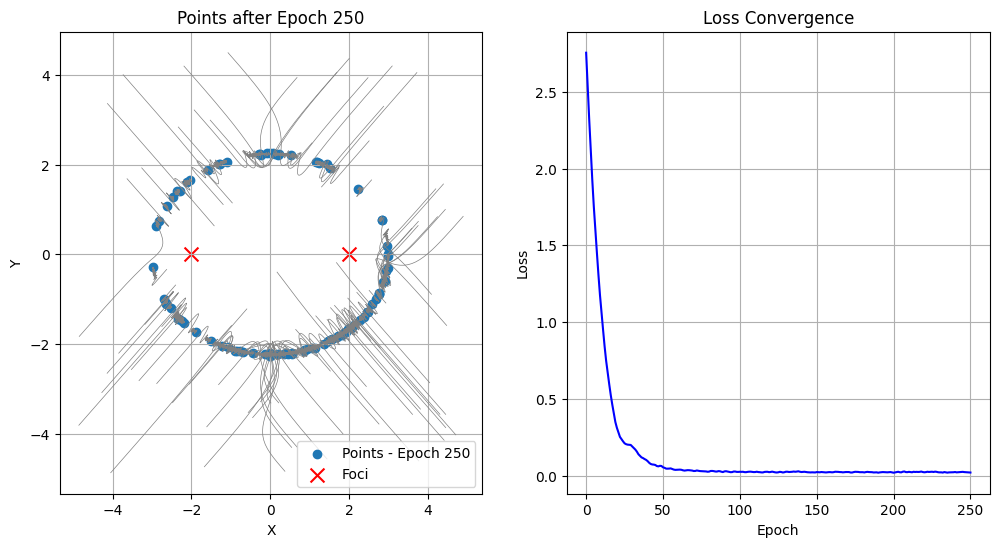

Epoch 250: Loss = 0.019486


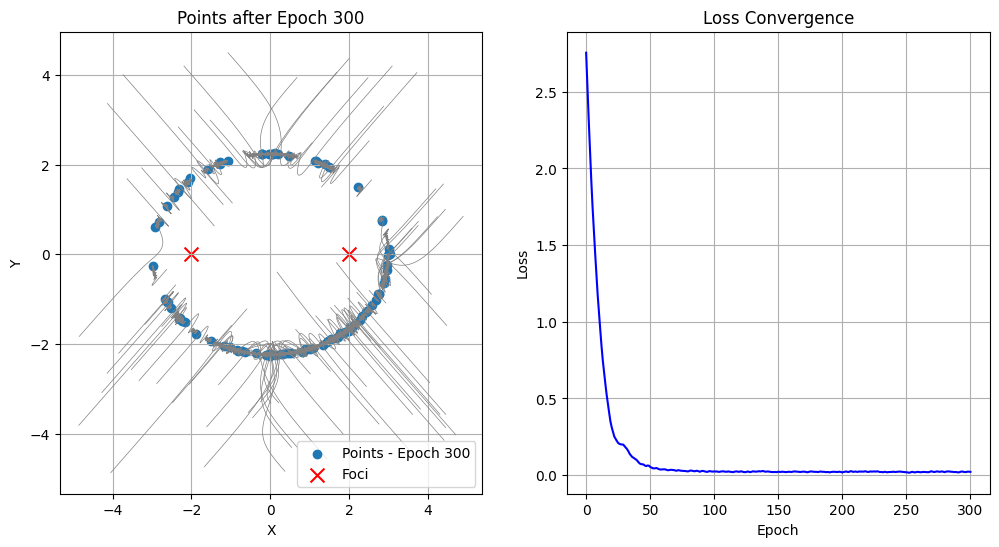

Epoch 300: Loss = 0.021560


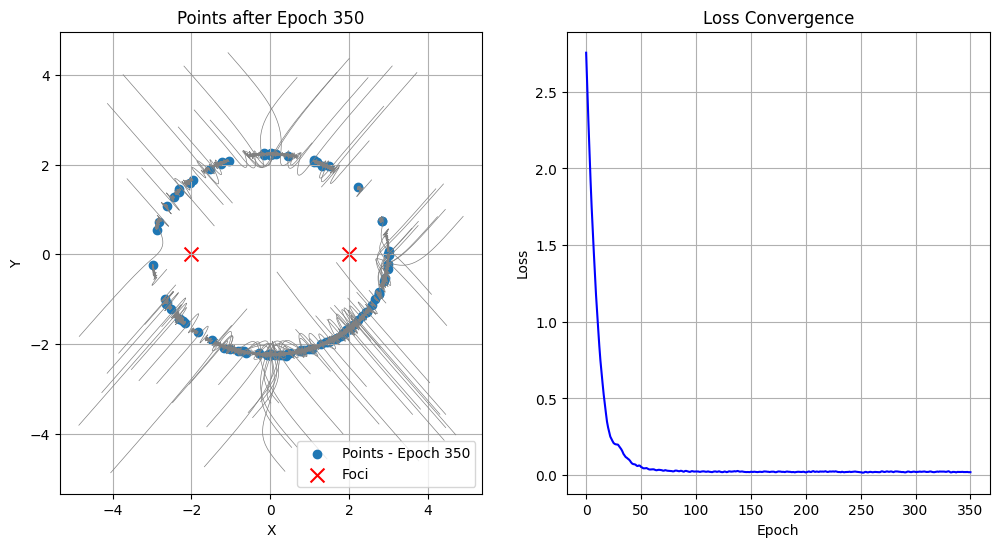

Epoch 350: Loss = 0.019547


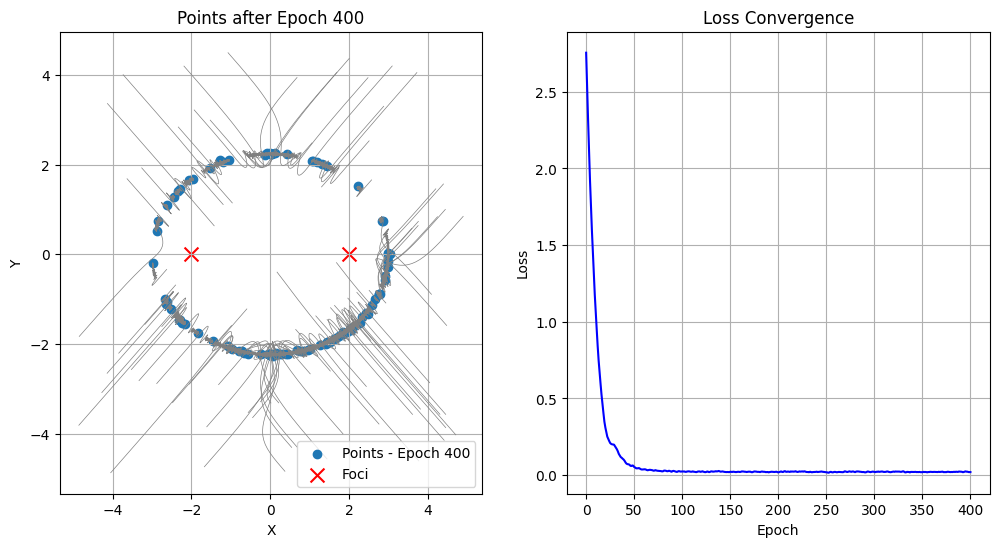

Epoch 400: Loss = 0.020092


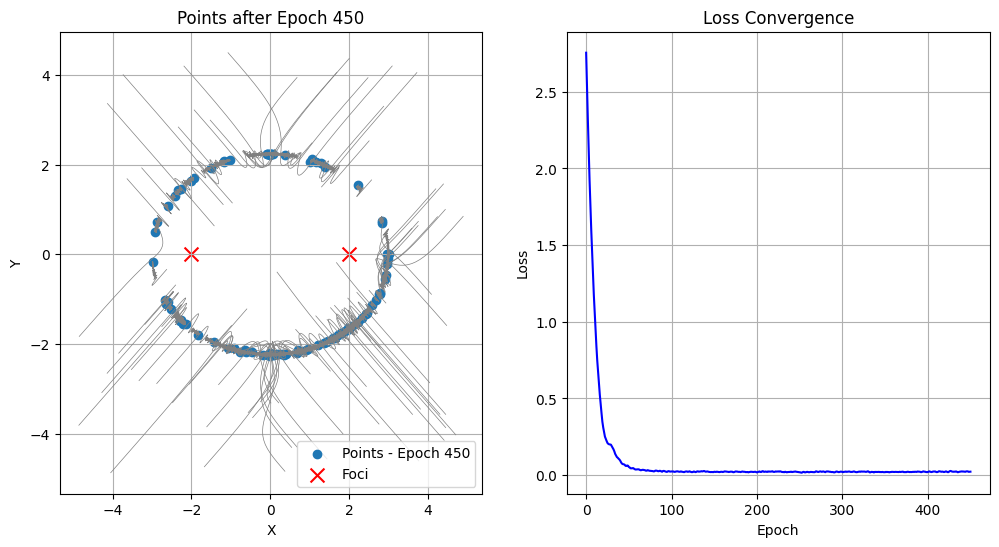

Epoch 450: Loss = 0.022939


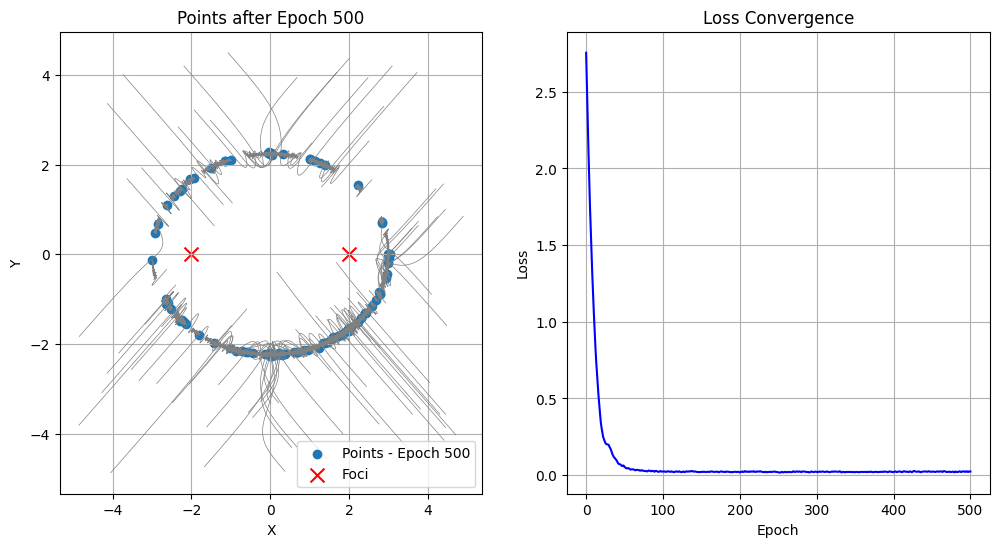

Epoch 500: Loss = 0.023886


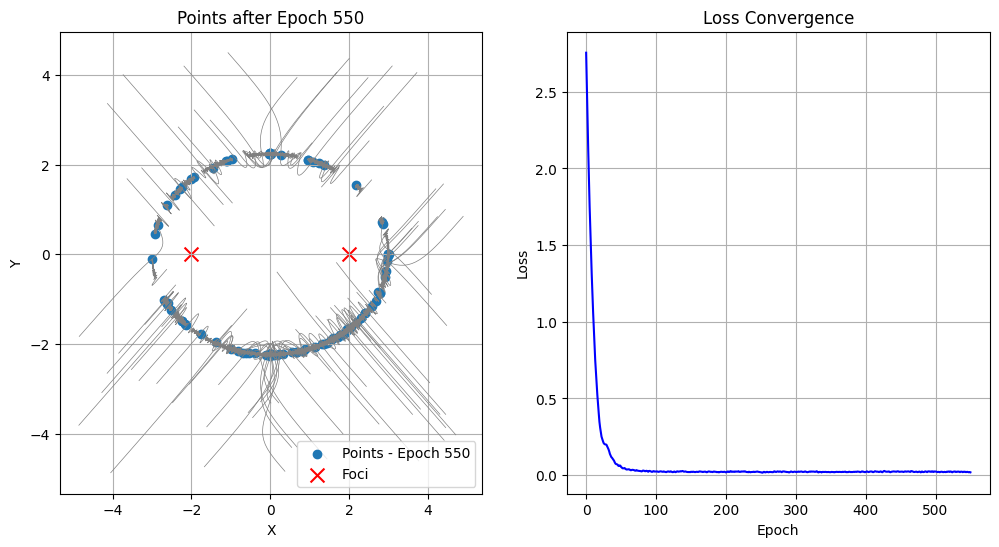

Epoch 550: Loss = 0.018777


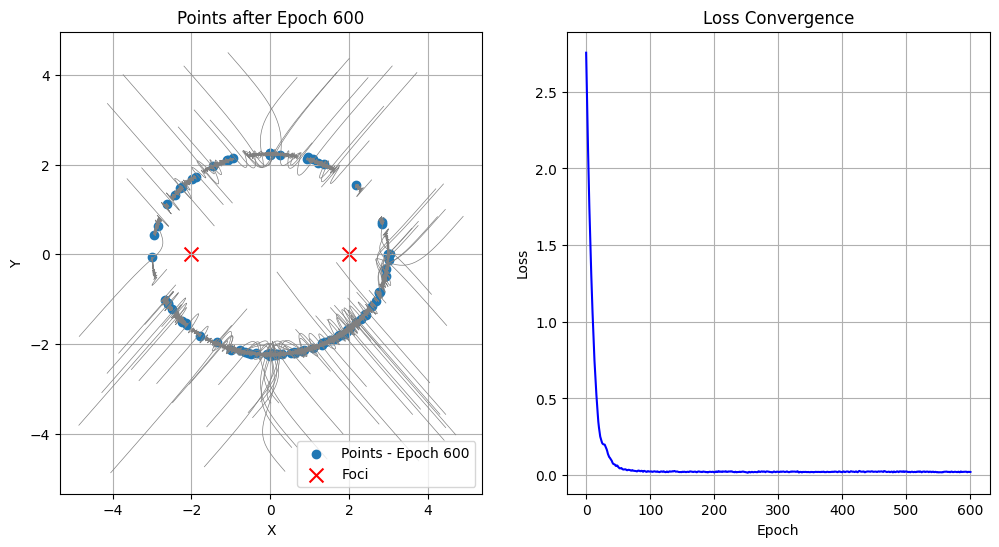

Epoch 600: Loss = 0.020951


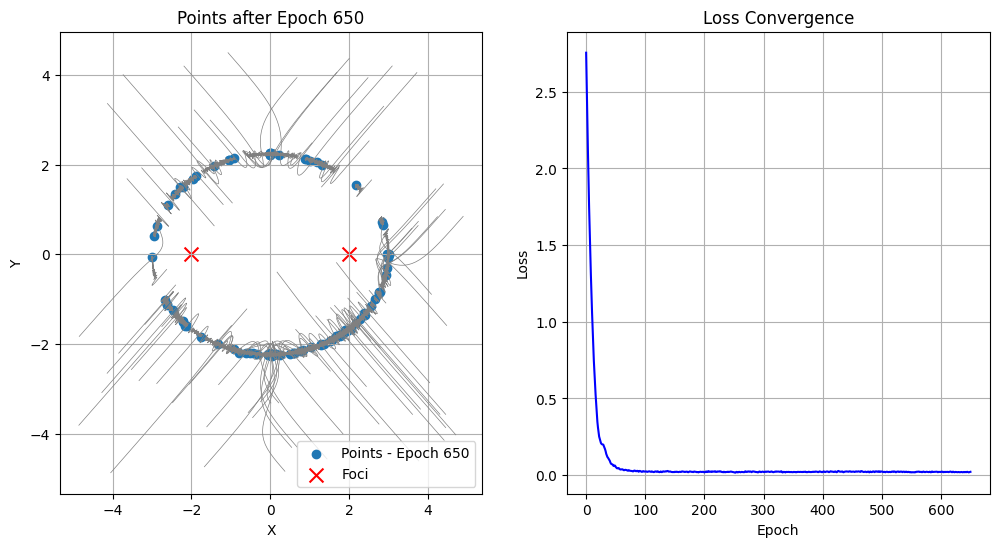

Epoch 650: Loss = 0.021975


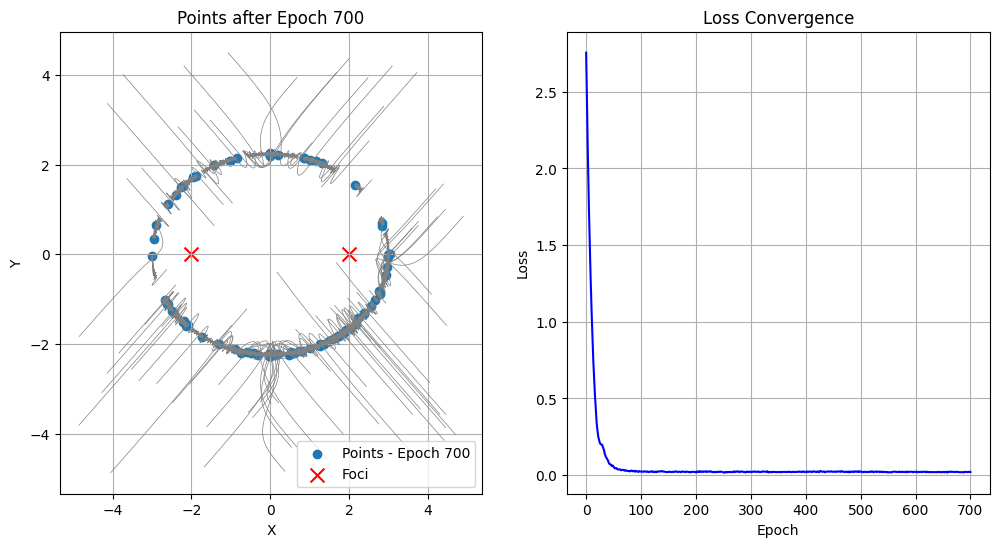

Epoch 700: Loss = 0.021168


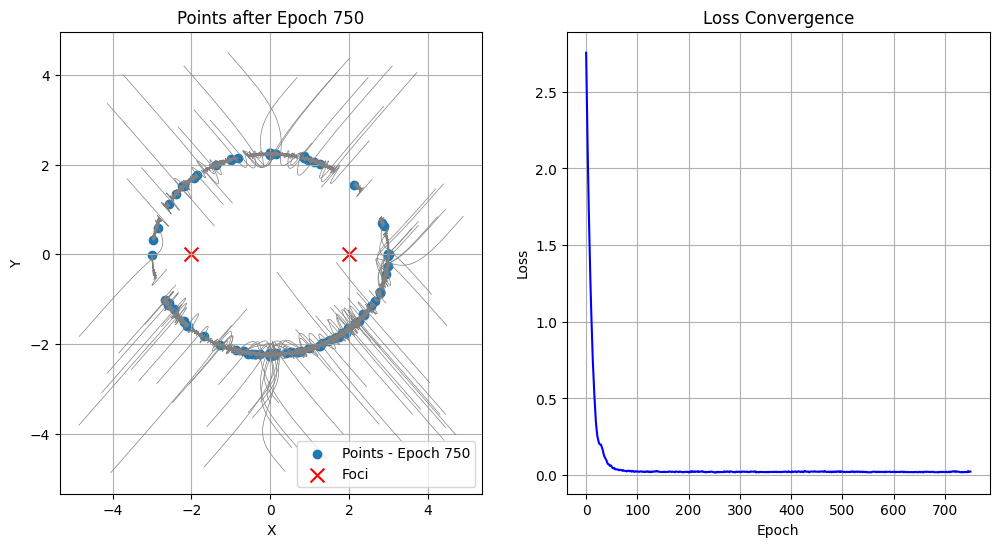

Epoch 750: Loss = 0.023482


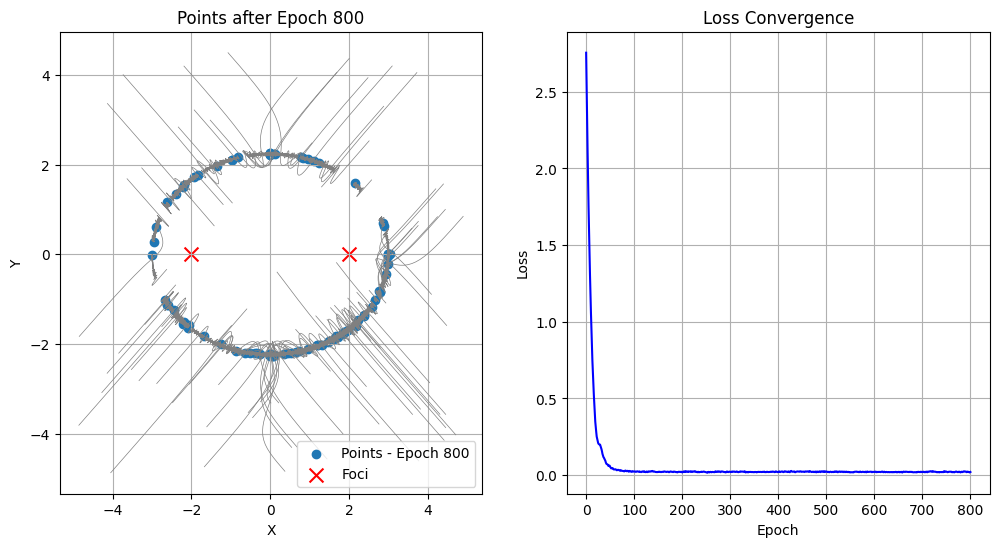

Epoch 800: Loss = 0.020631


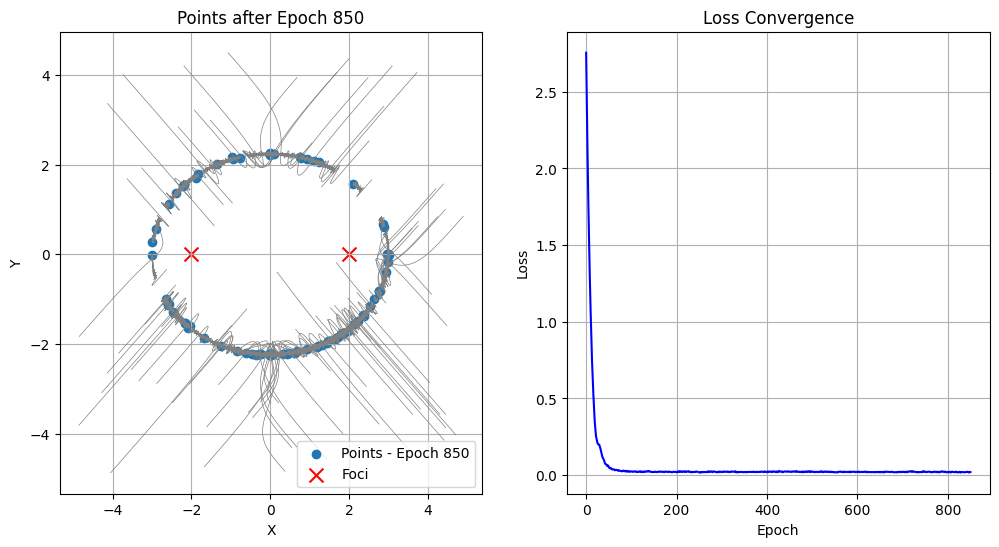

Epoch 850: Loss = 0.020709


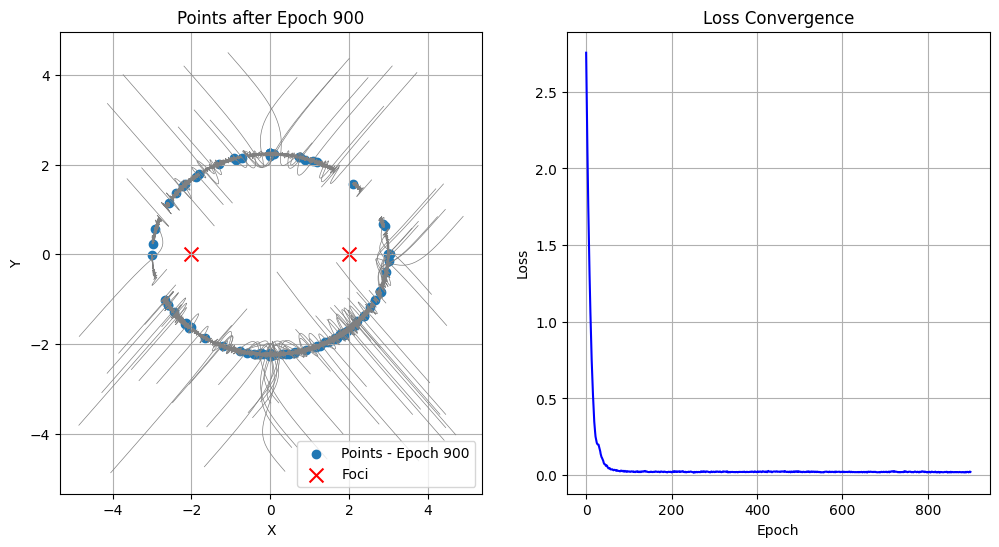

Epoch 900: Loss = 0.021403


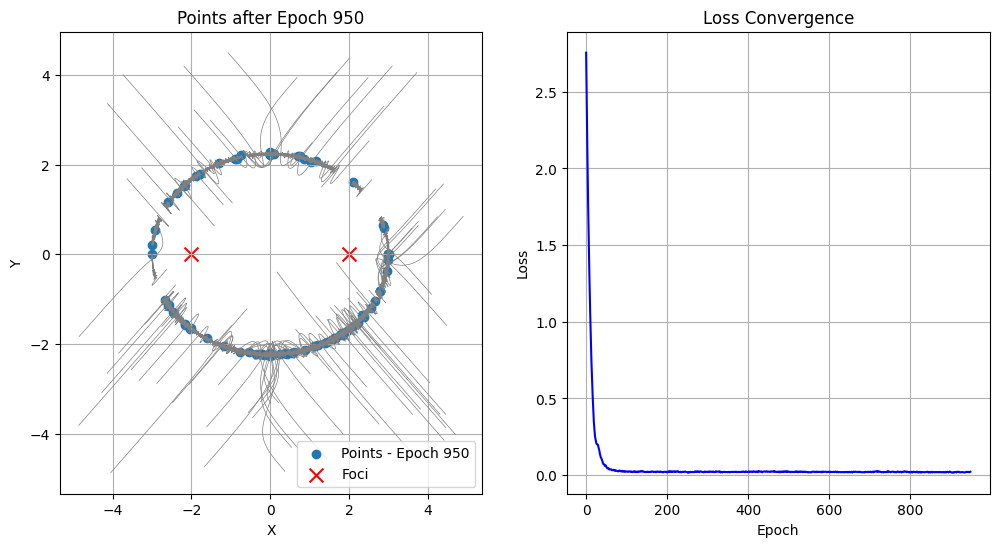

Epoch 950: Loss = 0.022547


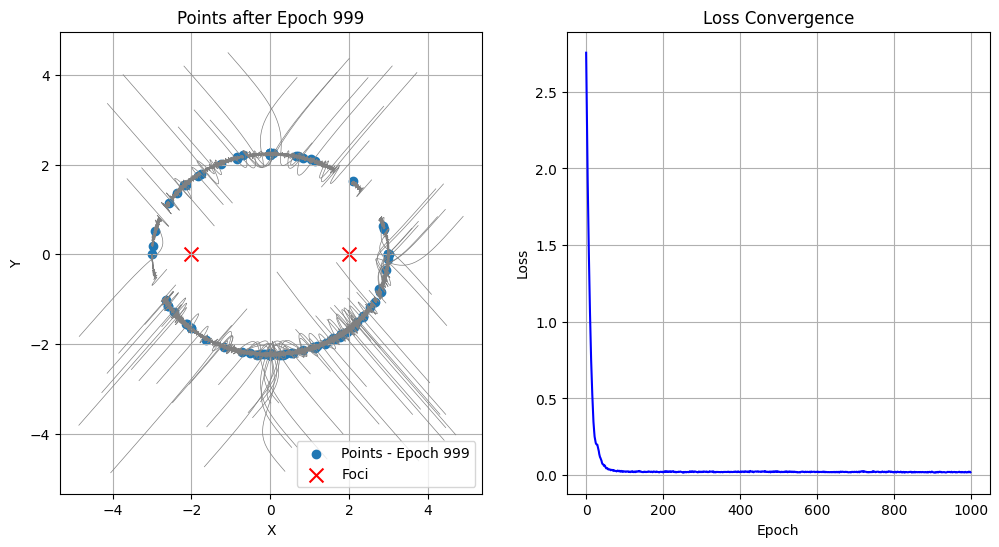

Elapsed time: 14.404778957366943 seconds


In [40]:
# L1 norm
train(loss_type="l1")

**Why does the training loss not converge, even after the ellipse has been fully drawn?**

The $\ell_1$ norm is not smooth at zero

The function $|x|$ has a "kink" at $x=0$, meaning that gradients are not well-behaved around small errors.

Even if the points are perfectly on the ellipse, small numerical errors will cause tiny $\epsilon_i$ values and the optimizer will keep trying to correct them, causing oscillations.

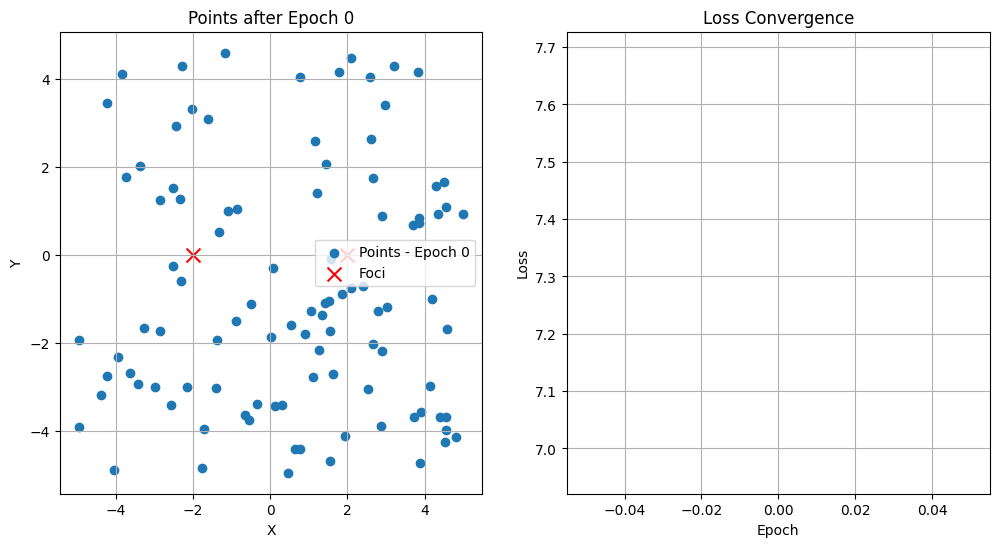

Epoch 0: Loss = 7.323938


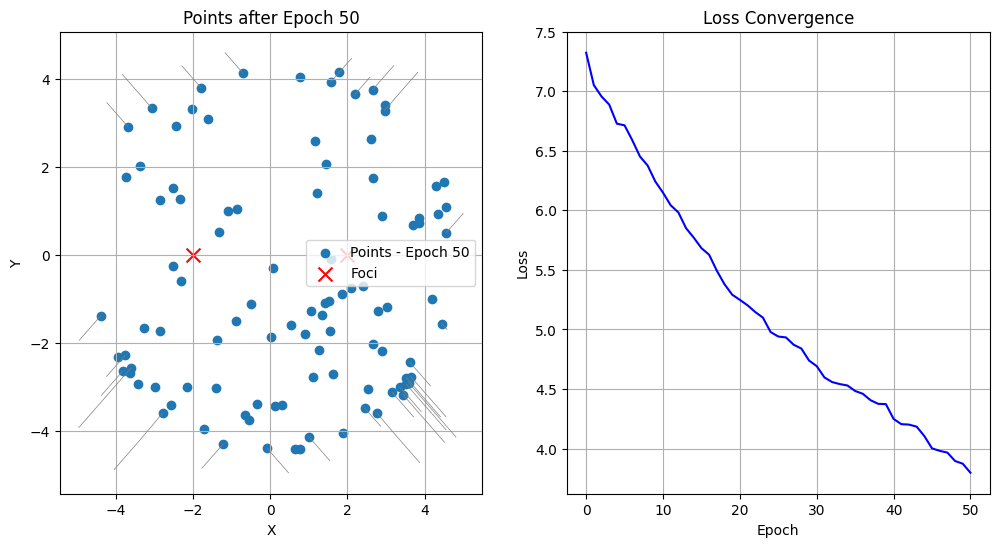

Epoch 50: Loss = 3.796906


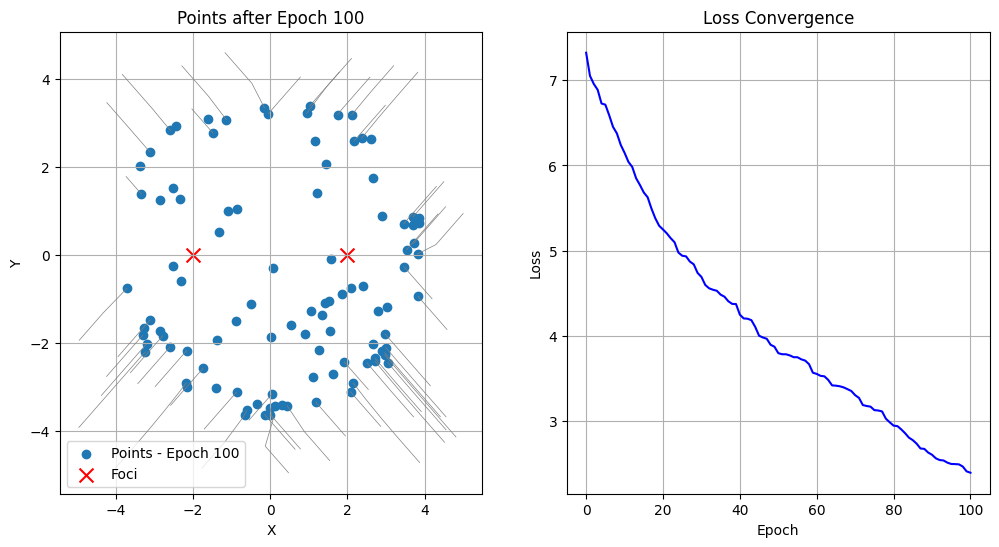

Epoch 100: Loss = 2.393175


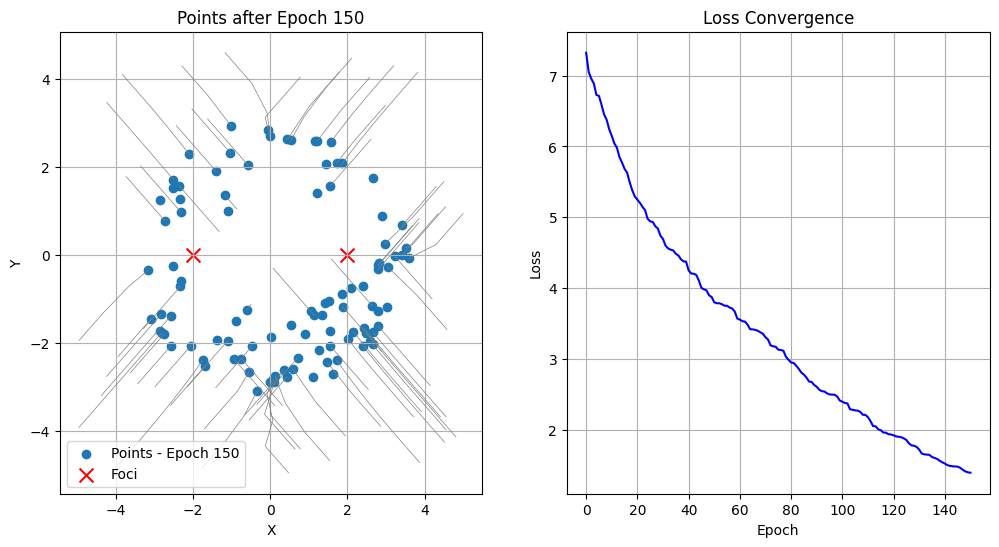

Epoch 150: Loss = 1.389654


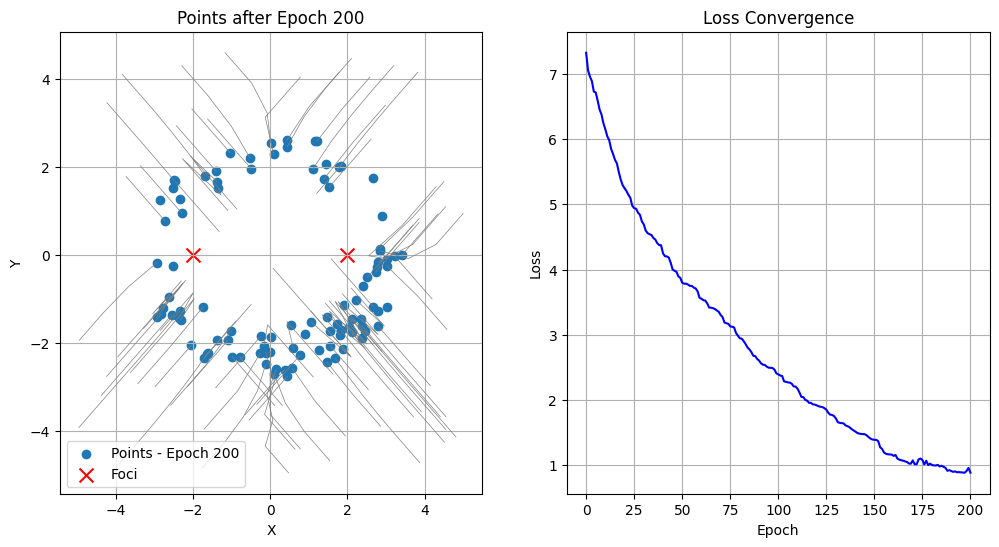

Epoch 200: Loss = 0.886059


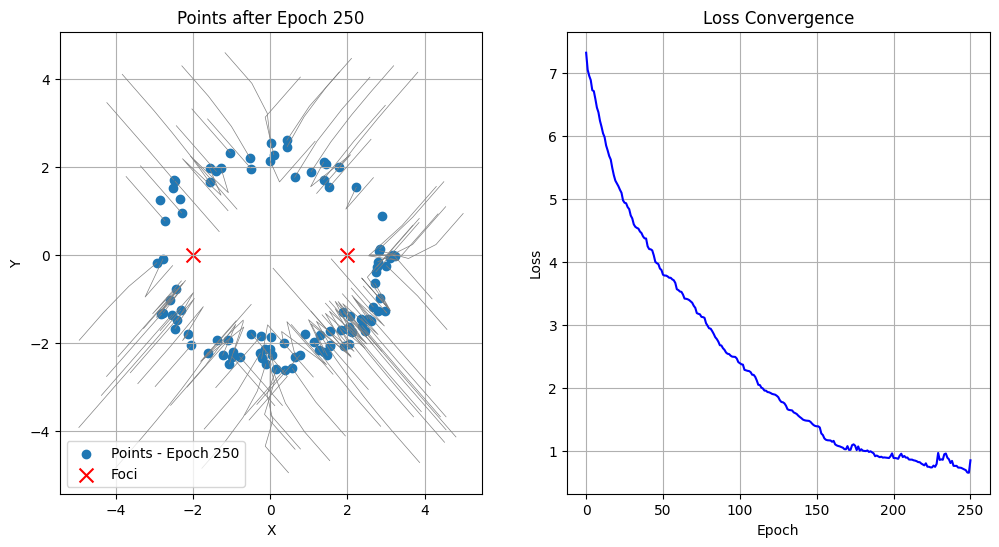

Epoch 250: Loss = 0.849135


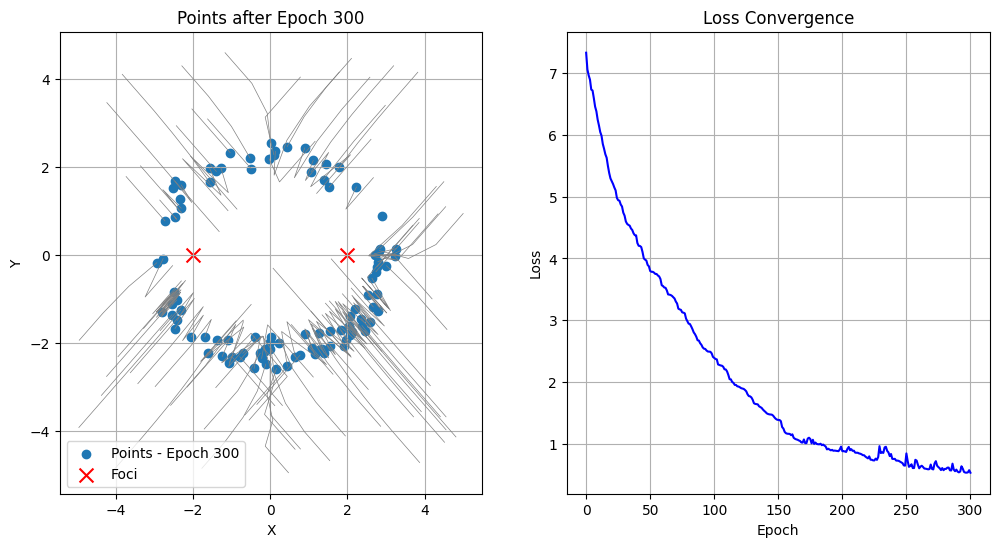

Epoch 300: Loss = 0.537400


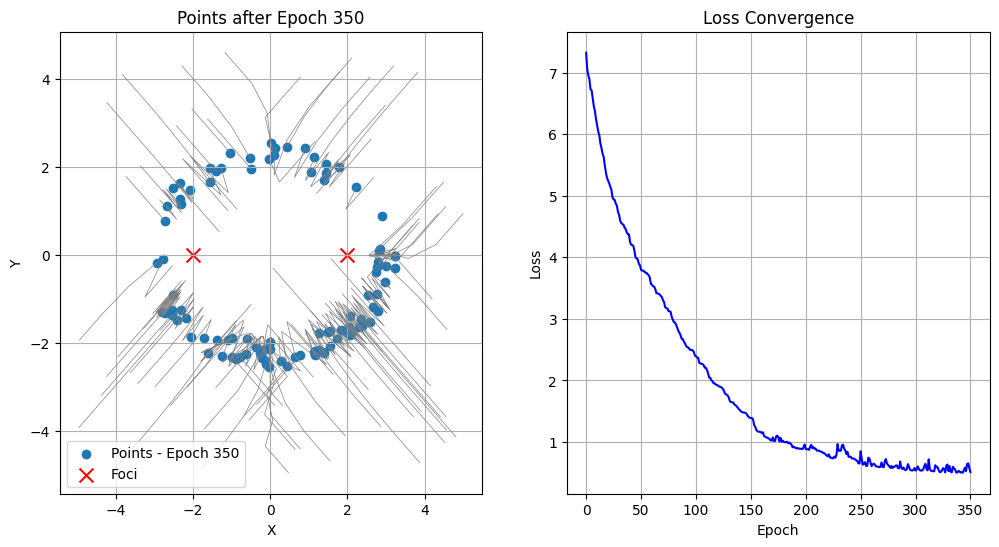

Epoch 350: Loss = 0.512818


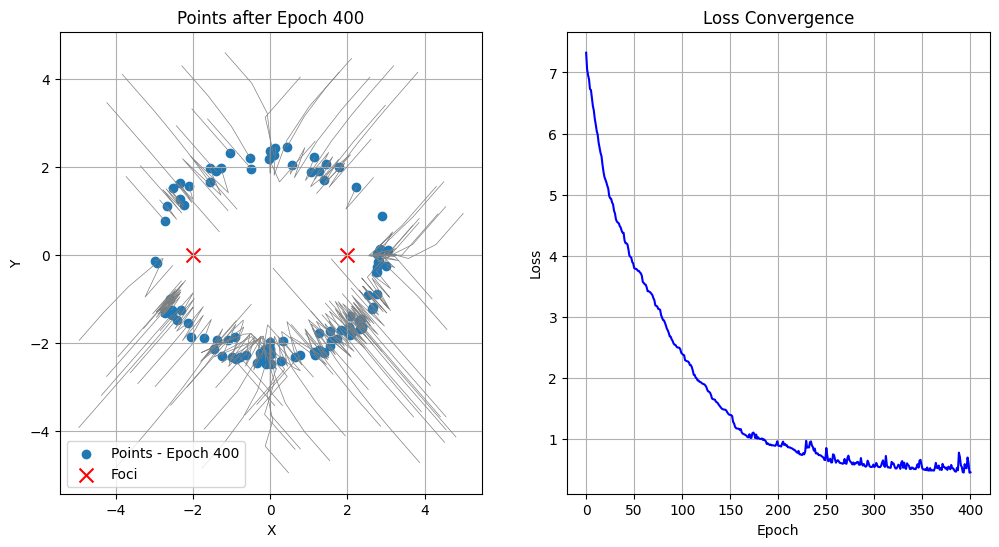

Epoch 400: Loss = 0.450674


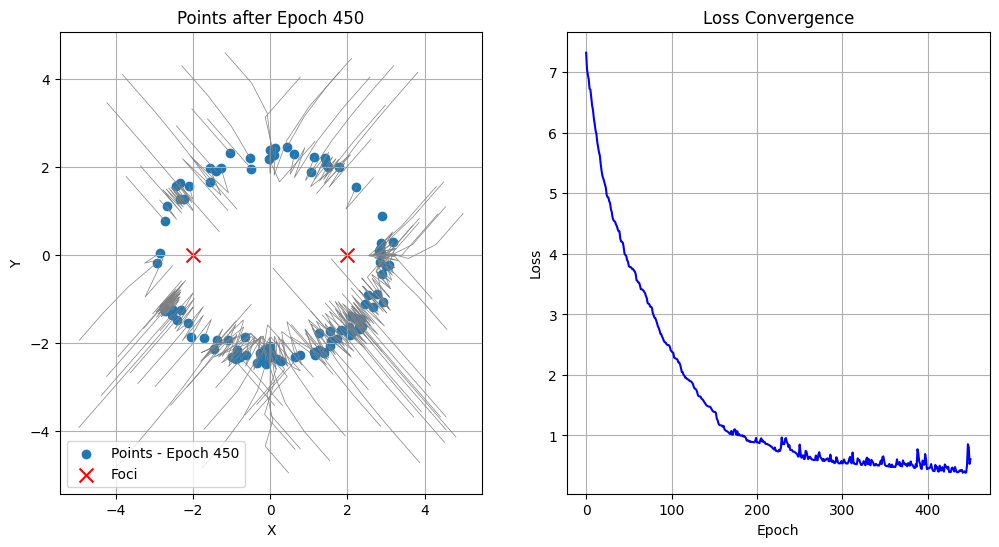

Epoch 450: Loss = 0.605147


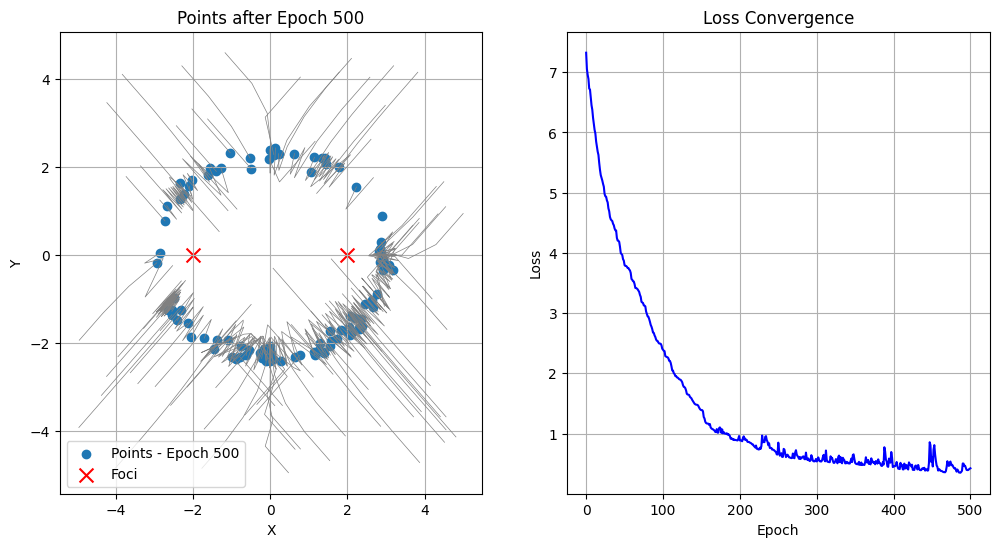

Epoch 500: Loss = 0.422950


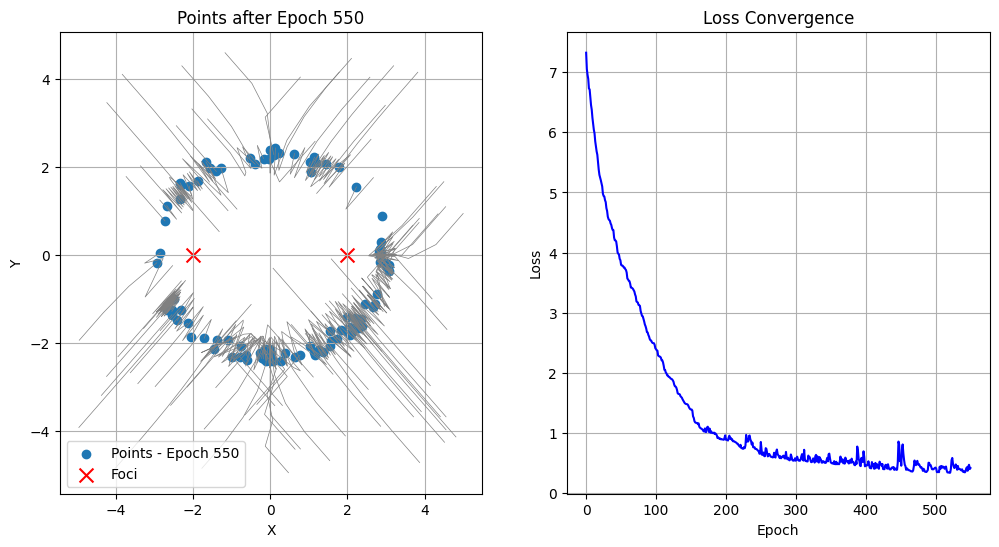

Epoch 550: Loss = 0.415533


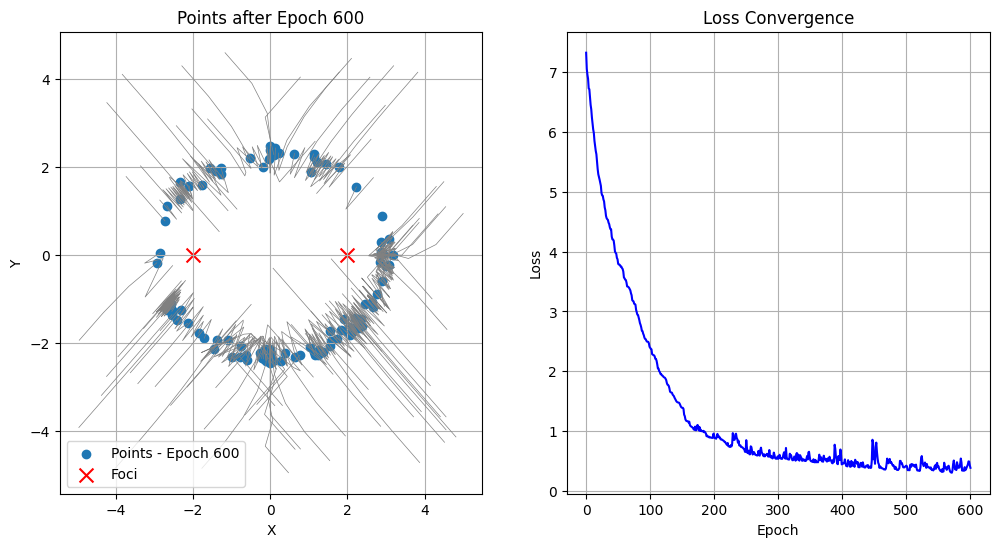

Epoch 600: Loss = 0.386727


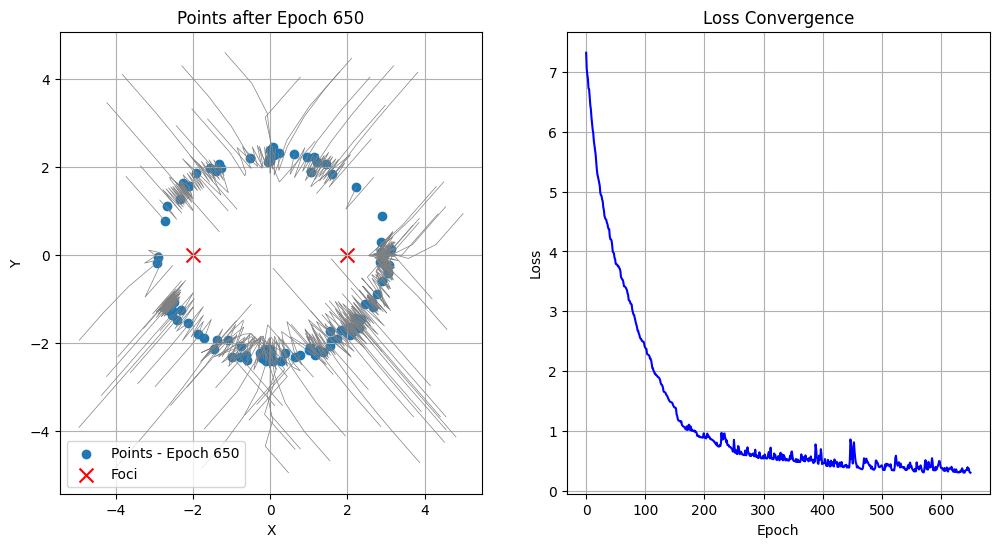

Epoch 650: Loss = 0.299376


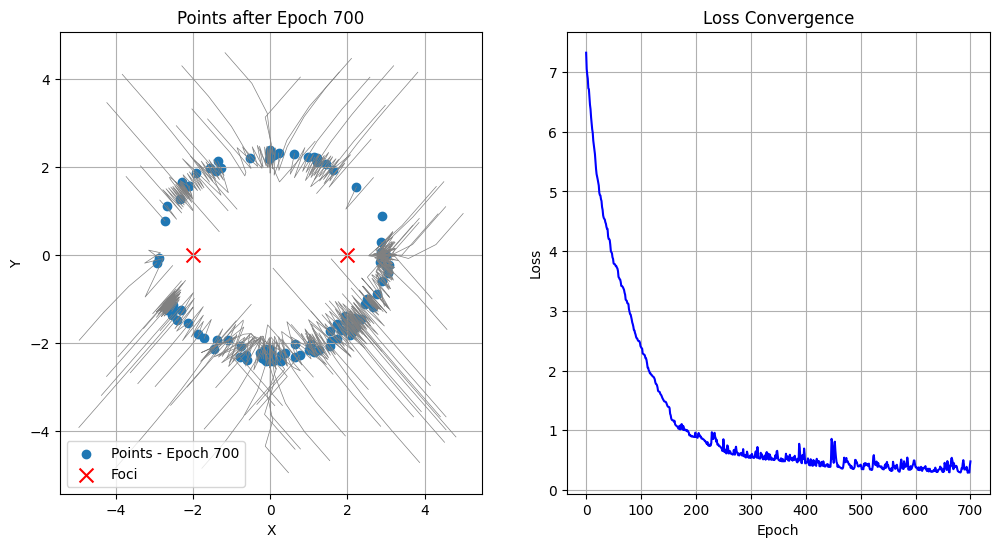

Epoch 700: Loss = 0.477611


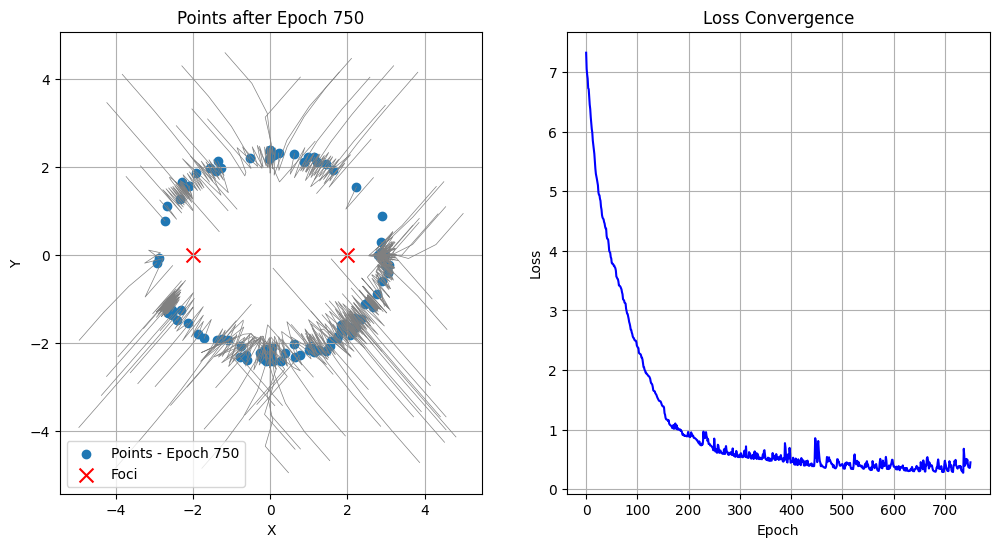

Epoch 750: Loss = 0.450883


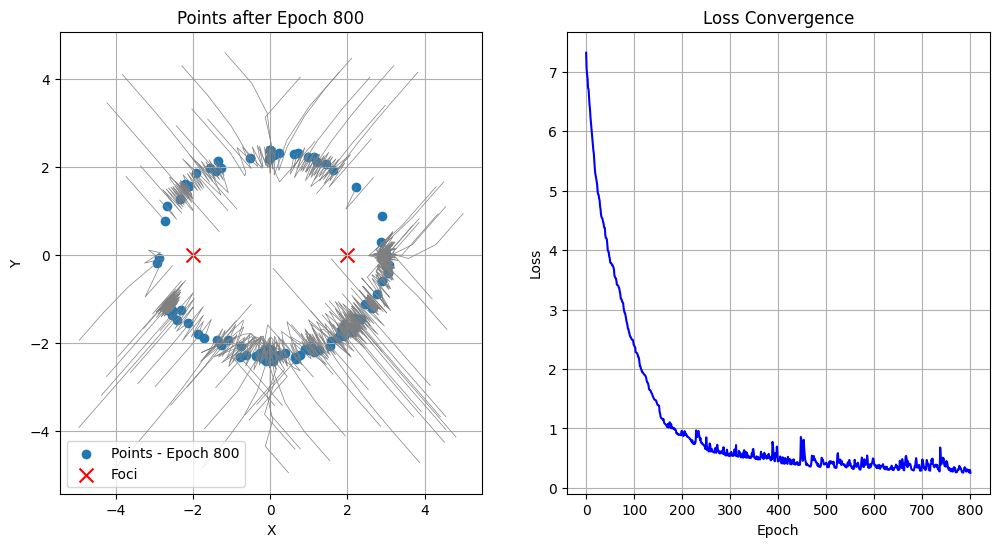

Epoch 800: Loss = 0.254017


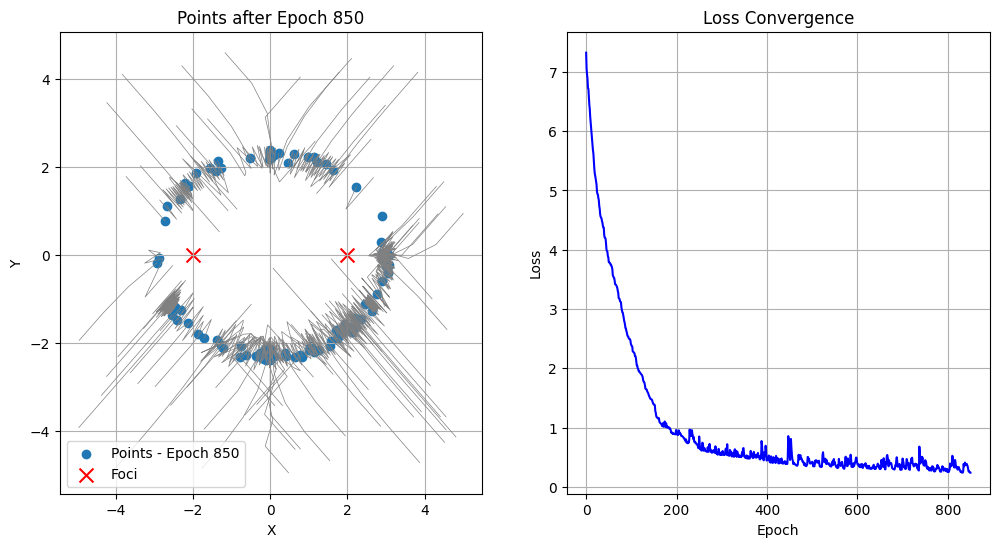

Epoch 850: Loss = 0.238534


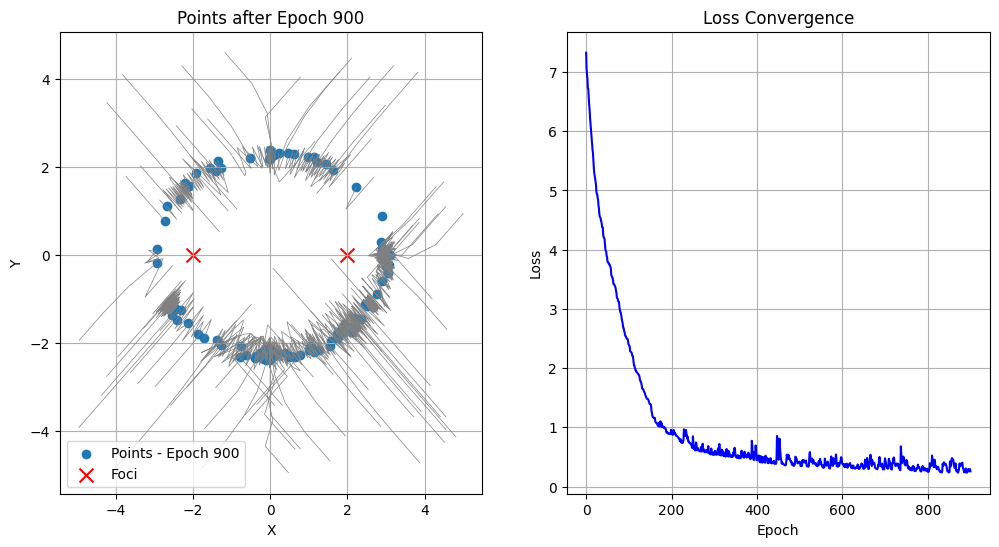

Epoch 900: Loss = 0.257050


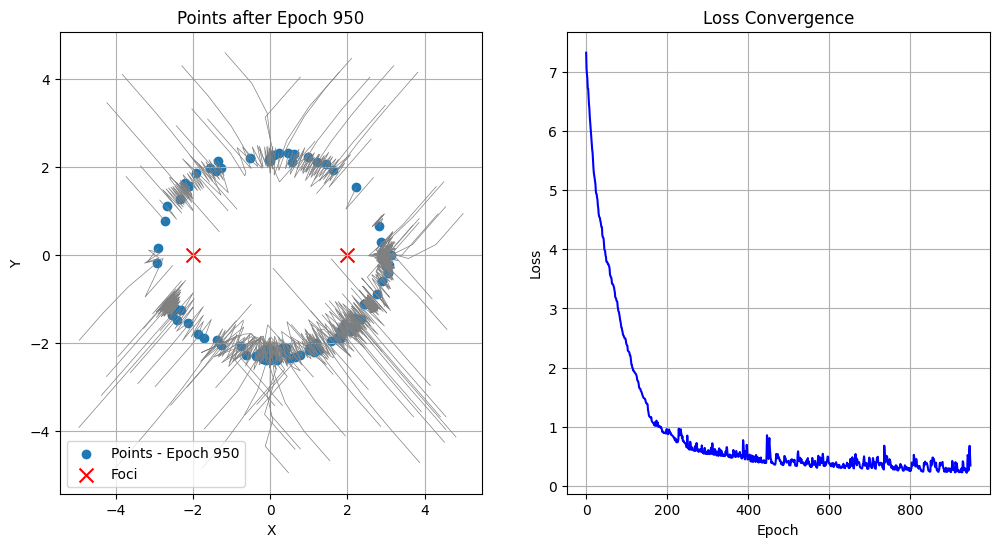

Epoch 950: Loss = 0.343327


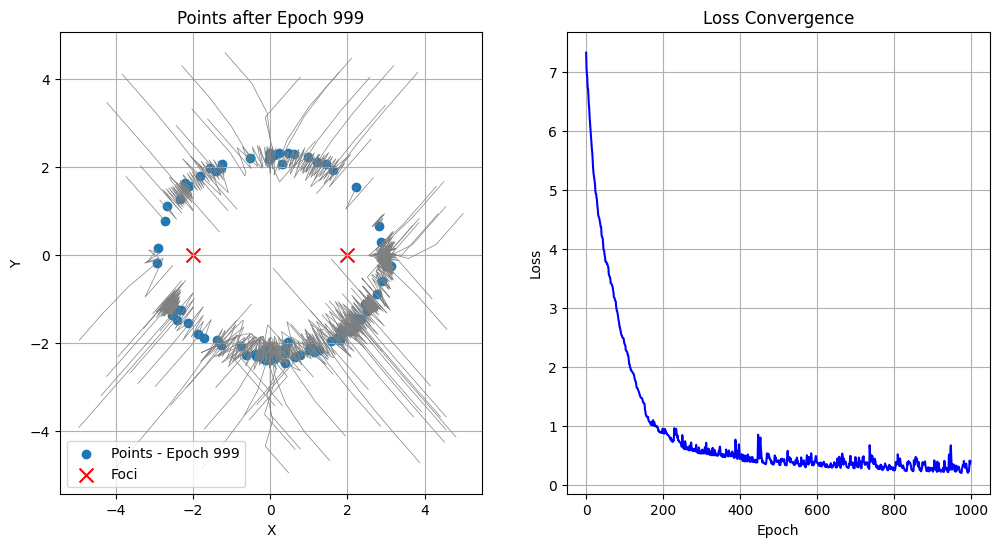

Elapsed time: 14.59572434425354 seconds


In [41]:
#L_inf norm
train(loss_type="linf")

**Why does training take so long and not converge either?**

$\ell_\infty$ only cares about the single worst point:
The loss is dominated by the point with the biggest error.

So even if almost every point is correctly placed, the optimizer focuses only on the single worst point.

Once that worst point improves, a different point might become the new worst offender.
This "worst-point-hopping" slows convergence a lot.